# Week 3 - Classification

### YIMIN LI liym15@uchicago.edu

In [99]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition
from sklearn import *

import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas as pd
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

<span style="color:red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

### 10 Artifical Datasets

In [52]:
# Generate df_train, df_test
def generate_df():
    noise = 0.2
    index_df = random.randint(1,5)
    if index_df == 1:
        dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.random())
        print("Random")
    elif index_df == 2:
        dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise))
        print("AndSplit")
    elif index_df == 3:
        dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise))
        print("XorSplit")
    elif index_df == 4:
        dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise))
        print("targetSplit")
    else:
        dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise))
        print("multiblobs")
    return dfTrain, dfTest

In [53]:
def plt_artificial_datasets():
    dfTrain, dfTest = generate_df()
    ls_clf = [sklearn.naive_bayes.GaussianNB(), sklearn.neighbors.KNeighborsClassifier(5, weights='distance'),
           sklearn.linear_model.LogisticRegression(), sklearn.tree.DecisionTreeClassifier(),
           sklearn.ensemble.RandomForestClassifier(), sklearn.neural_network.MLPClassifier(),
           sklearn.ensemble.GradientBoostingClassifier()]
    for clf in ls_clf:
        print(clf)
        clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
        print(lucem_illud_2020.evaluateClassifier(clf, dfTest))
        #lucem_illud_2020.plotConfusionMatrix(clf, dfTest) # Can remove the uncomment for drawing confusion matrix
        #lucem_illud_2020.plotMultiROC(clf, dfTest) # Can remove the uncomment for drawing AUC
        lucem_illud_2020.plotregions(clf, dfTrain)

multiblobs
GaussianNB(priors=None, var_smoothing=1e-09)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.000  1.000000   1.000000           1.000000  1.000000
1              0.000  1.000000   1.000000           1.000000  1.000000
2              0.024  0.953383   0.956522           0.892812  0.916667
3              0.024  0.968871   0.918367           0.887288  0.957447
4              0.000  1.000000   1.000000           1.000000  1.000000


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

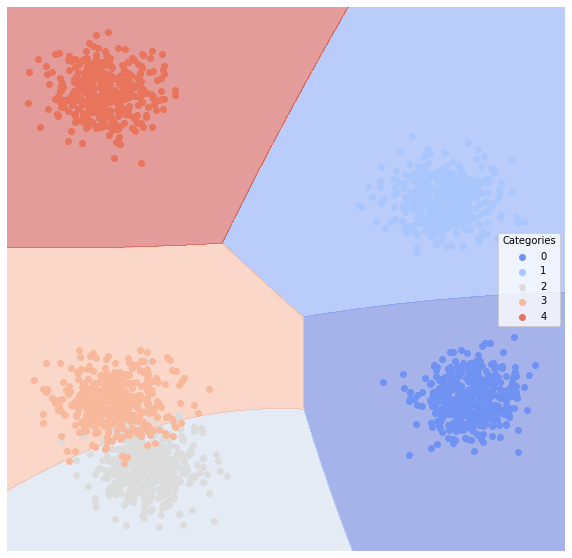

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.000  1.000000   1.000000           1.000000  1.000000
1              0.000  1.000000   1.000000           1.000000  1.000000
2              0.028  0.950908   0.936170           0.874156  0.916667
3              0.028  0.958233   0.916667           0.870156  0.936170
4              0.000  1.000000   1.000000           1.000000  1.000000


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

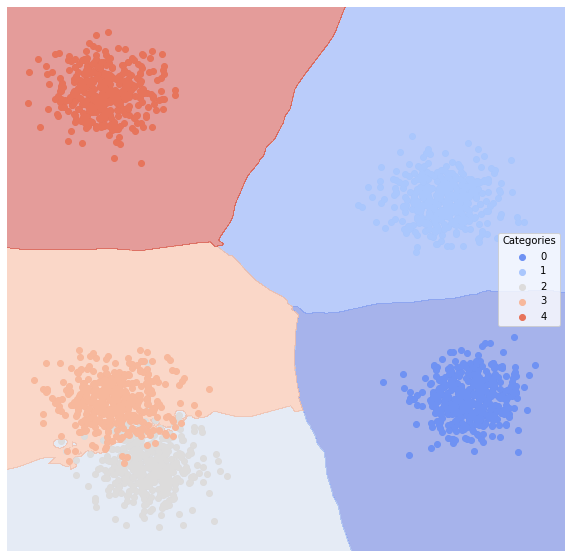

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.000  1.000000   1.000000            1.00000  1.000000
1              0.000  1.000000   1.000000            1.00000  1.000000
2              0.024  0.957354   0.946809            0.89177  0.927083
3              0.024  0.964784   0.927083            0.88777  0.946809
4              0.000  1.000000   1.000000            1.00000  1.000000


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

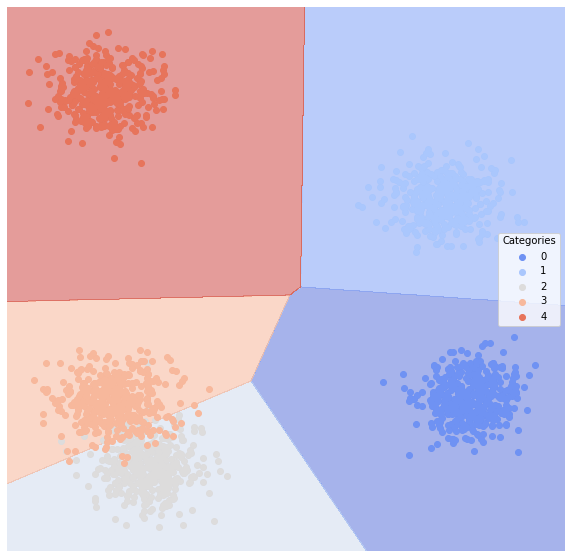

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.000  1.000000   1.000000           1.000000  1.000000
1              0.000  1.000000   1.000000           1.000000  1.000000
2              0.036  0.941986   0.906250           0.839289  0.906250
3              0.036  0.941044   0.904255           0.835678  0.904255
4              0.000  1.000000   1.000000           1.000000  1.000000


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

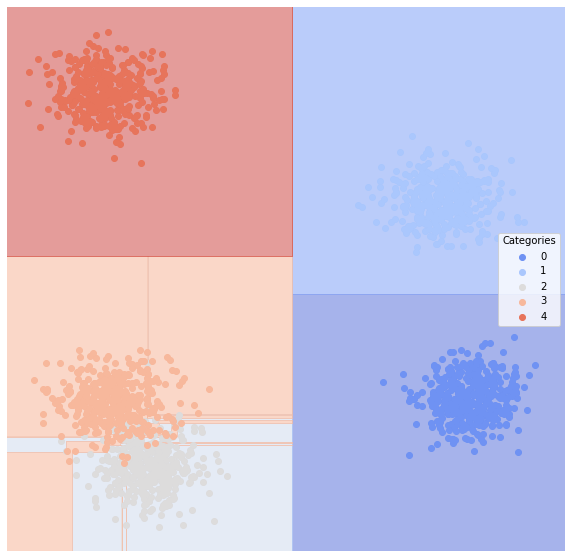

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.000  1.000000   1.000000           1.000000  1.000000
1              0.000  1.000000   1.000000           1.000000  1.000000
2              0.028  0.954878   0.927083           0.873484  0.927083
3              0.028  0.954145   0.925532           0.870609  0.925532
4              0.000  1.000000   1.000000           1.000000  1.000000


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

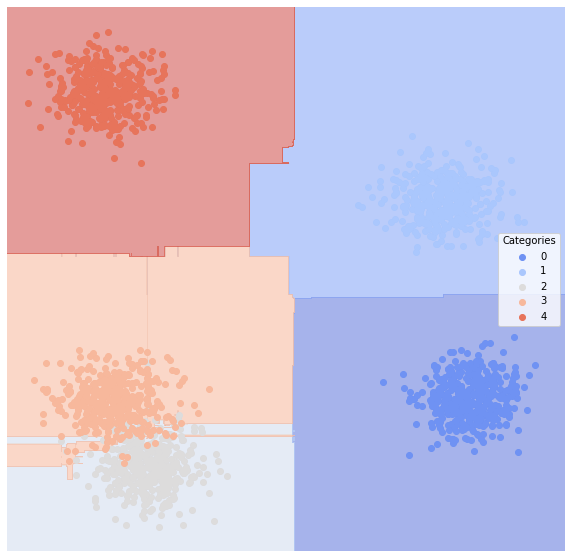

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.000  1.000000   1.000000           1.000000  1.000000
1              0.000  1.000000   1.000000           1.000000  1.000000
2              0.026  0.948175   0.956044           0.884415  0.906250
3              0.026  0.967640   0.909091           0.878406  0.957447
4              0.000  1.000000   1.000000           1.000000  1.000000


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

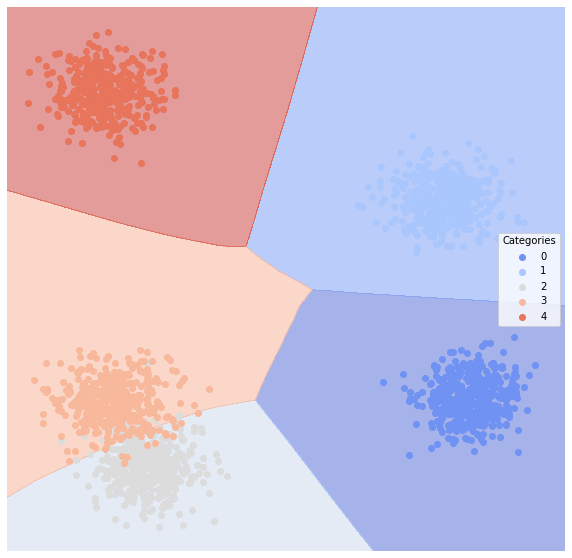

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.00  1.000000   1.000000           1.000000  1.000000
1               0.00  1.000000   1.000000           1.000000  1.000000
2               0.03  0.941729   0.94505

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

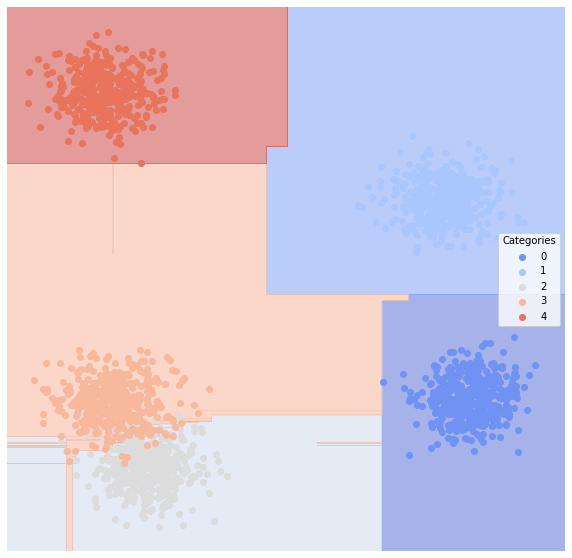

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


targetSplit
GaussianNB(priors=None, var_smoothing=1e-09)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.085  0.914941   0.911765           0.879546  0.920792
1              0.085  0.914941   0.918367           0.879879  0.909091


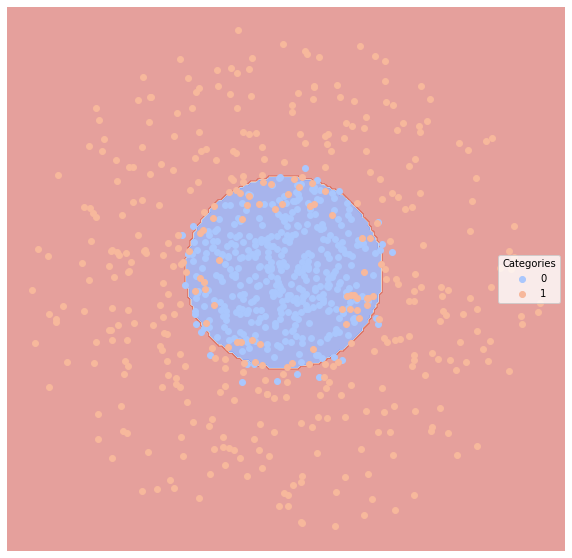

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')
          Error_Rate      AUC  Precision  Average_Precision    Recall
Category                                                             
0                0.1  0.89989   0.893204           0.858611  0.910891
1                0.1  0.89989   0.907216           0.861415  0.888889


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


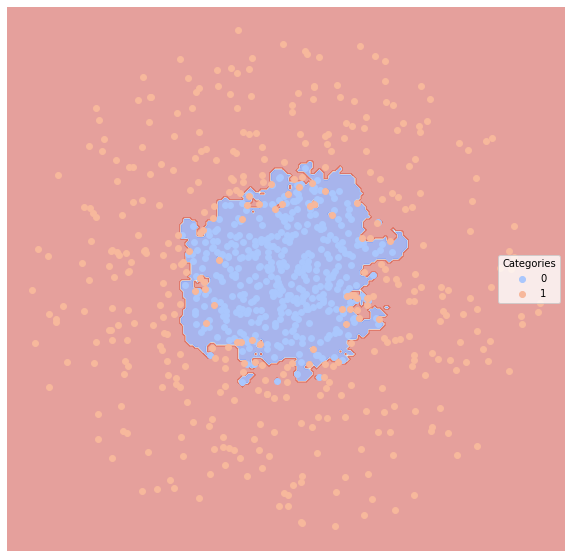

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
          Error_Rate     AUC  Precision  Average_Precision    Recall
Category                                                            
0              0.505  0.4953   0.500000           0.502673  0.465347
1              0.505  0.4953   0.490566           0.492671  0.525253


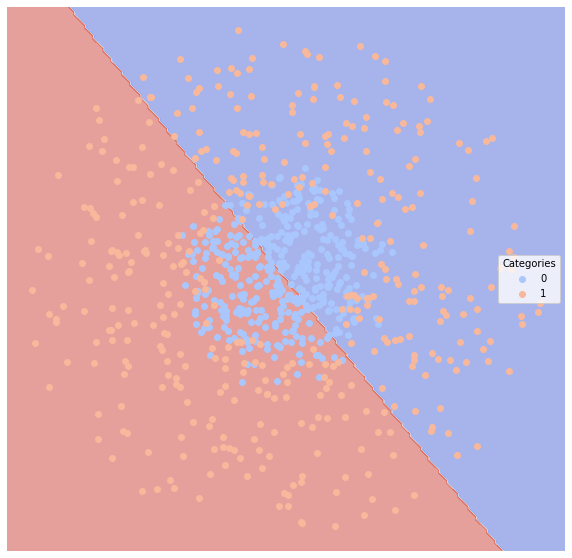

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.13  0.870387   0.903226           0.836198  0.831683
1               0.13  0.870387   0.841121           0.809656  0.909091


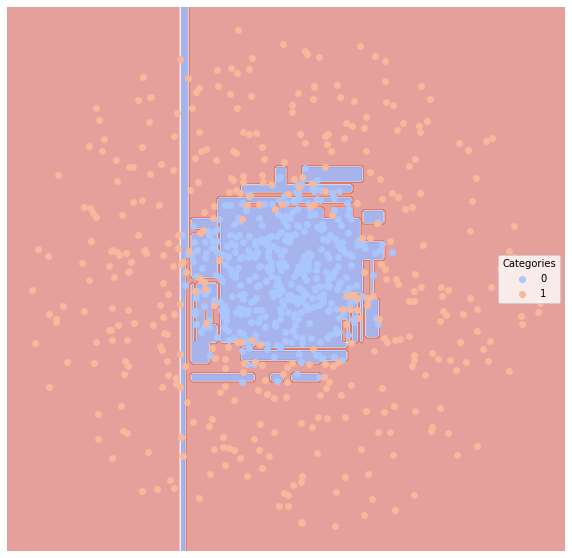

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
          Error_Rate      AUC  Precision  Average_Precision    Recall
Category                                                             
0                0.1  0.89969   0.878505           0.852618  0.930693
1                0.1  0.89969   0.924731           0.868302  0.868687


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


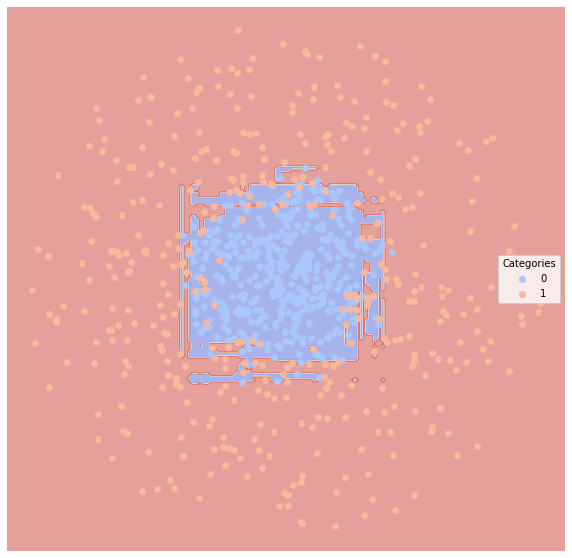

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


C:\Users\qmun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.085  0.914741   0.896226           0.872985  0.940594
1              0.085  0.914741   0.936170           0.887151  0.888889


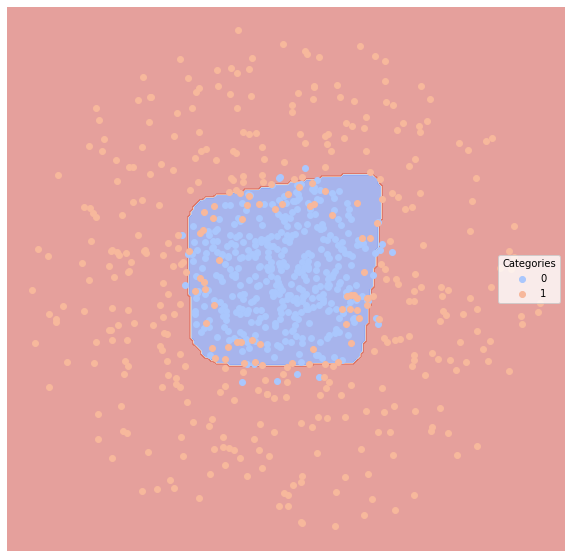

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.08  0.920092   0.929293           0.891485  0.910891
1               0.08  0.920092   0.910891           0.881485  0.929293


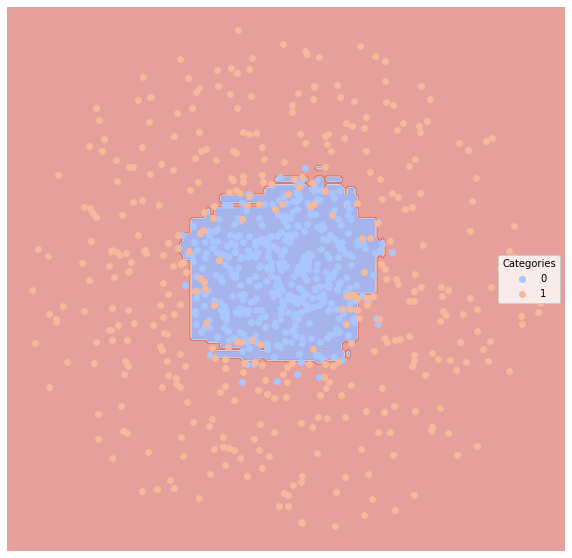

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


targetSplit
GaussianNB(priors=None, var_smoothing=1e-09)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.11  0.888393   0.901786           0.868217  0.901786
1               0.11  0.888393   0.875000           0.820625  0.875000


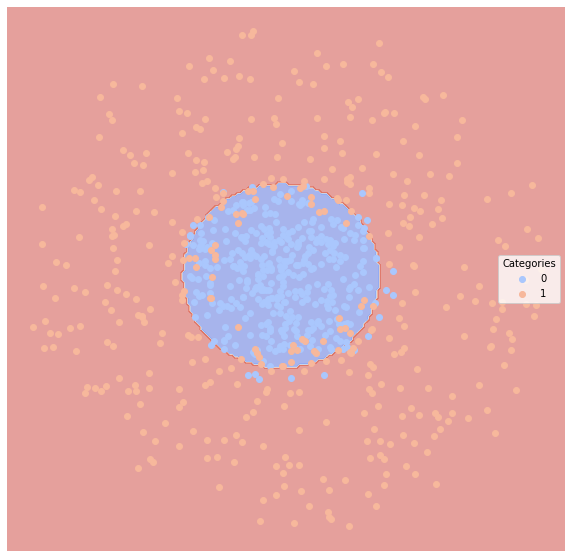

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')
          Error_Rate      AUC  Precision  Average_Precision    Recall
Category                                                             
0               0.14  0.86039   0.888889           0.841905  0.857143
1               0.14  0.86039   0.826087           0.773439  0.863636


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


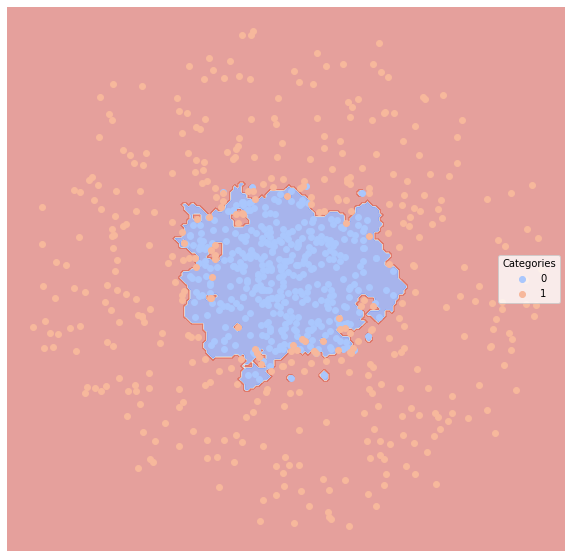

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.67  0.373782   0.041667           0.555372  0.008929
1               0.67  0.373782   0.369318           0.387792  0.738636


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


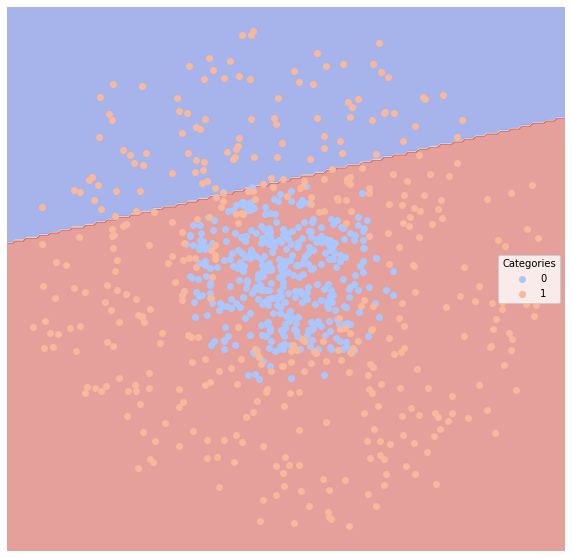

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.16  0.841315   0.877358           0.823521  0.830357
1               0.16  0.841315   0.797872           0.745005  0.852273


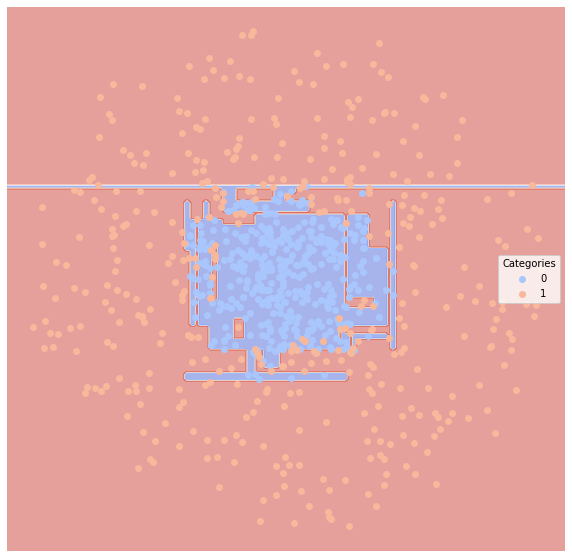

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.11  0.890828   0.916667           0.875268  0.883929
1               0.11  0.890828   0.858696           0.815875  0.897727


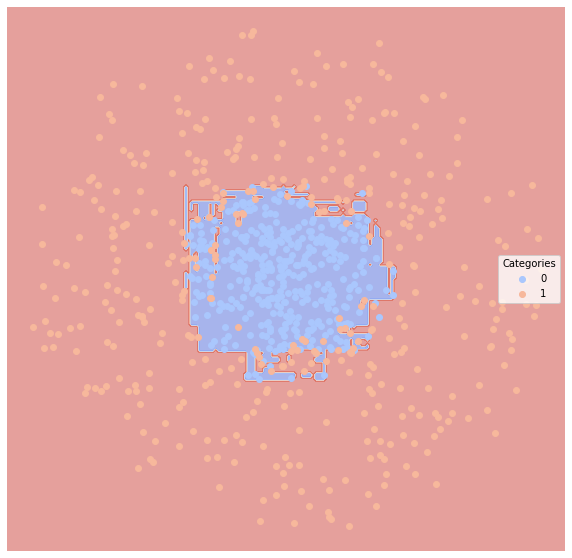

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


C:\Users\qmun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.13  0.868101   0.883929           0.846330  0.883929
1               0.13  0.868101   0.852273           0.791369  0.852273


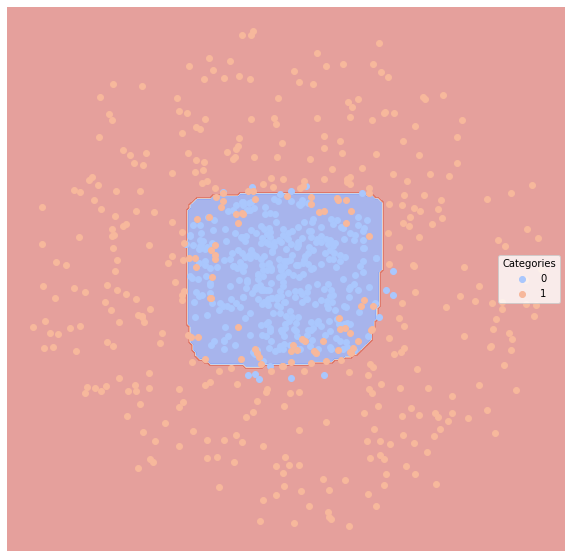

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.115  0.883929   0.900901           0.864376  0.892857
1              0.115  0.883929   0.865169           0.812022  0.875000


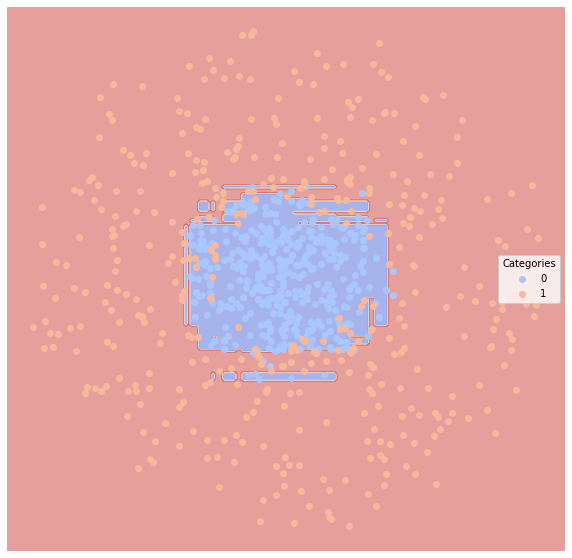

multiblobs
GaussianNB(priors=None, var_smoothing=1e-09)
          Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                       
0                0.0  1.0        1.0                1.0     1.0
1                0.0  1.0        1.0                1.0     1.0
2                0.0  1.0        1.0                1.0     1.0
3                0.0  1.0        1.0                1.0     1.0
4                0.0  1.0        1.0                1.0     1.0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

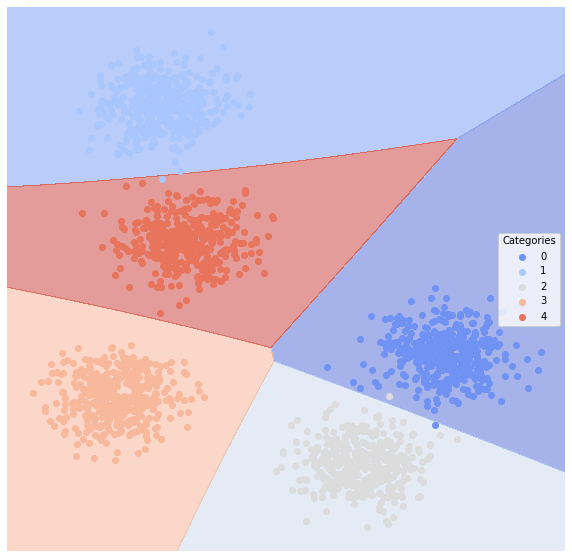

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')
          Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                       
0                0.0  1.0        1.0                1.0     1.0
1                0.0  1.0        1.0                1.0     1.0
2                0.0  1.0        1.0                1.0     1.0
3                0.0  1.0        1.0                1.0     1.0
4                0.0  1.0        1.0                1.0     1.0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

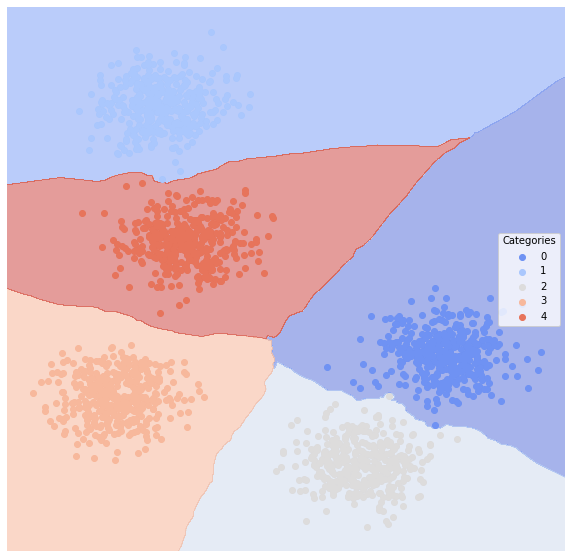

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.002  0.998786   0.988764           0.988764  1.000000
1              0.004  0.997481   0.980952           0.980952  1.000000
2              0.004  0.990385   1.000000           0.984769  0.980769
3              0.002  0.998756   0.989899           0.989899  1.000000
4              0.008  0.984709   0.990476           0.968706  0.971963


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

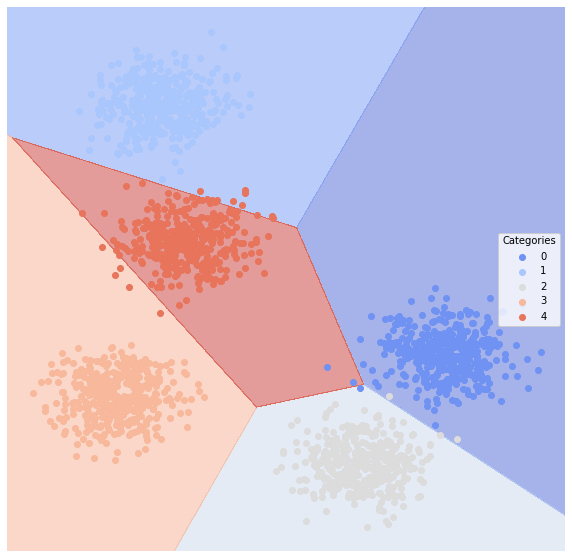

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
          Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                       
0                0.0  1.0        1.0                1.0     1.0
1                0.0  1.0        1.0                1.0     1.0
2                0.0  1.0        1.0                1.0     1.0
3                0.0  1.0        1.0                1.0     1.0
4                0.0  1.0        1.0                1.0     1.0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

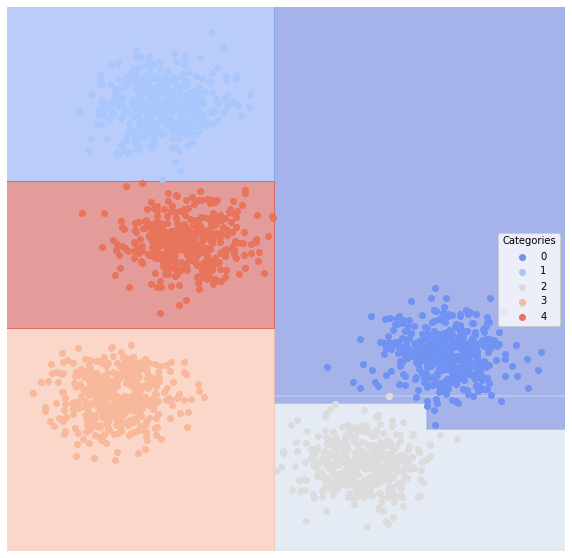

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
          Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                       
0                0.0  1.0        1.0                1.0     1.0
1                0.0  1.0        1.0                1.0     1.0
2                0.0  1.0        1.0                1.0     1.0
3                0.0  1.0        1.0                1.0     1.0
4                0.0  1.0        1.0                1.0     1.0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

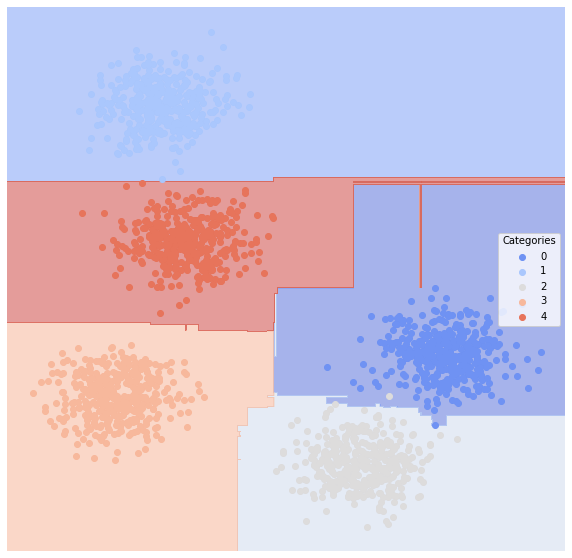

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


C:\Users\qmun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.002  0.998786   0.988764           0.988764  1.000000
1              0.000  1.000000   1.000000           1.000000  1.000000
2              0.002  0.995192   1.000000           0.992385  0.990385
3              0.000  1.000000   1.000000           1.000000  1.000000
4              0.000  1.000000   1.000000           1.000000  1.000000


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

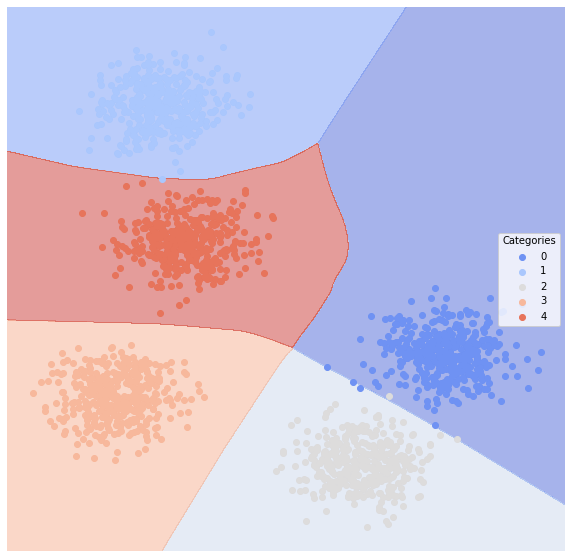

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
          Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                       
0                0.0  1.0        1.0                1.0     1.0
1                0.0  1.0        1.0                1.0     1.0
2                0.0  1.0        1.0                1.0     1.0
3   

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

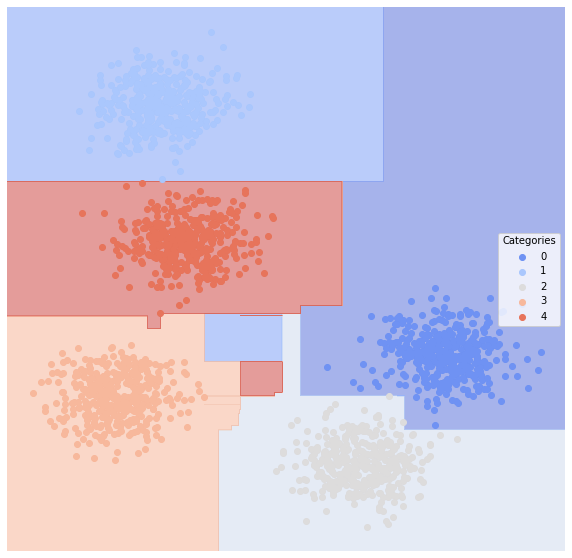

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


AndSplit
GaussianNB(priors=None, var_smoothing=1e-09)
          Error_Rate      AUC  Precision  Average_Precision    Recall
Category                                                             
0              0.095  0.90494   0.908163           0.866430  0.898990
1              0.095  0.90494   0.901961           0.866588  0.910891


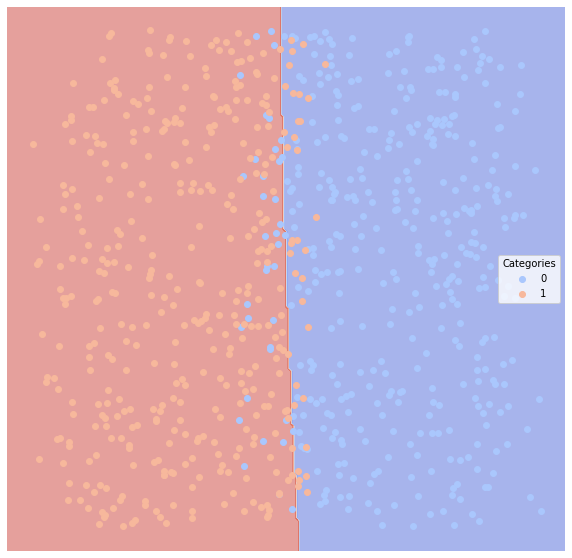

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.14  0.859686   0.881720           0.815314  0.828283
1               0.14  0.859686   0.841121           0.804514  0.891089


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


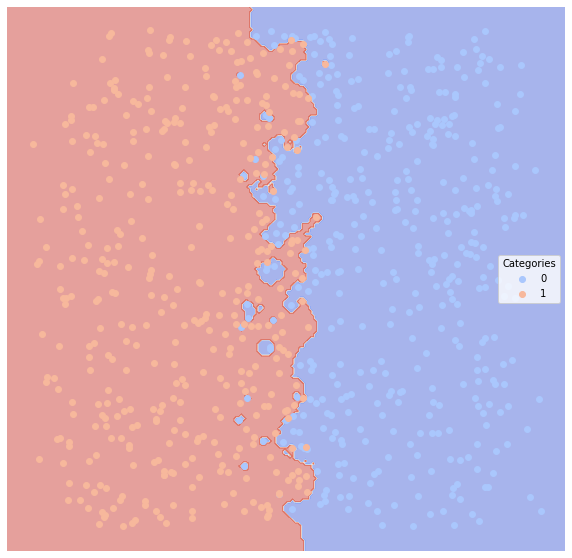

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.09  0.909991   0.909091           0.871446  0.909091
1               0.09  0.909991   0.910891           0.874723  0.910891


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


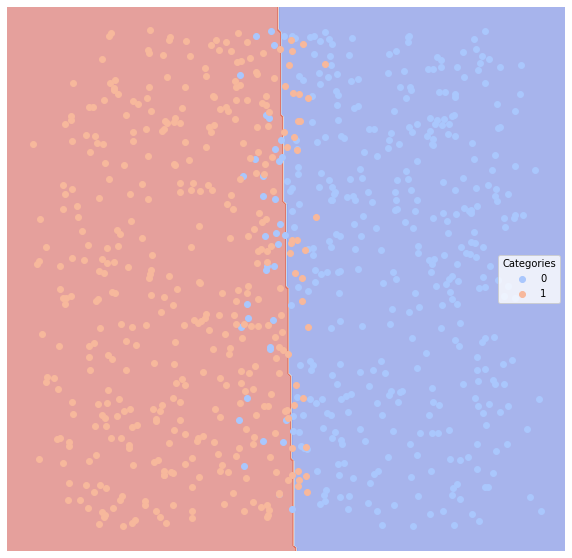

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.155  0.844734   0.861702           0.795029  0.818182
1              0.155  0.844734   0.830189           0.788333  0.871287


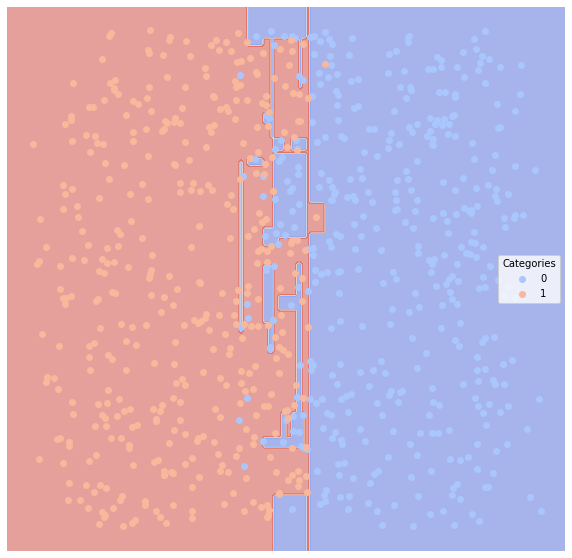

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.115  0.884838   0.895833           0.843199  0.868687
1              0.115  0.884838   0.875000           0.838366  0.900990


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


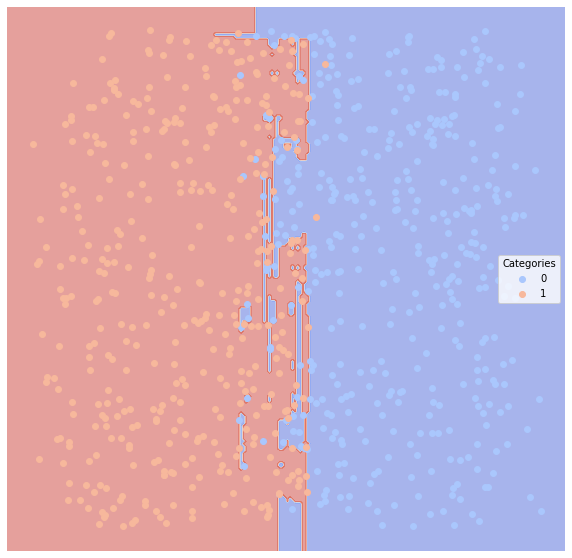

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.09  0.909991   0.909091           0.871446  0.909091
1               0.09  0.909991   0.910891           0.874723  0.910891


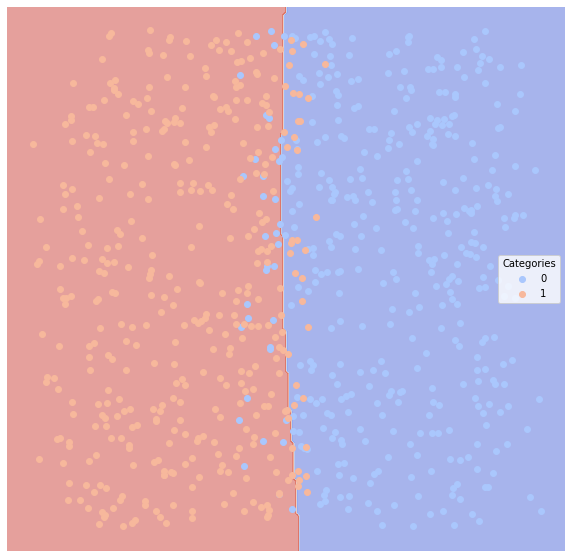

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
          Error_Rate      AUC  Precision  Average_Precision    Recall
Category                                                             
0                0.1  0.89969   0.924731           0.868302  0.868687
1                0.1  0.89969   0.878505           0.852618  0.930693


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


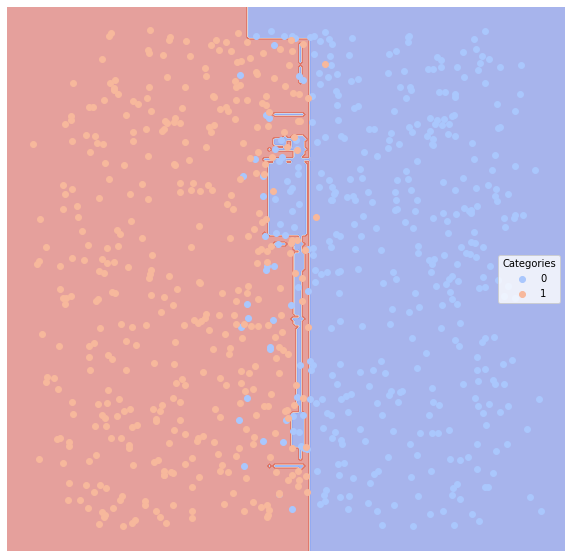

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


targetSplit
GaussianNB(priors=None, var_smoothing=1e-09)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.15  0.852267    0.79646           0.773984  0.927835
1               0.15  0.852267    0.91954           0.829206  0.776699


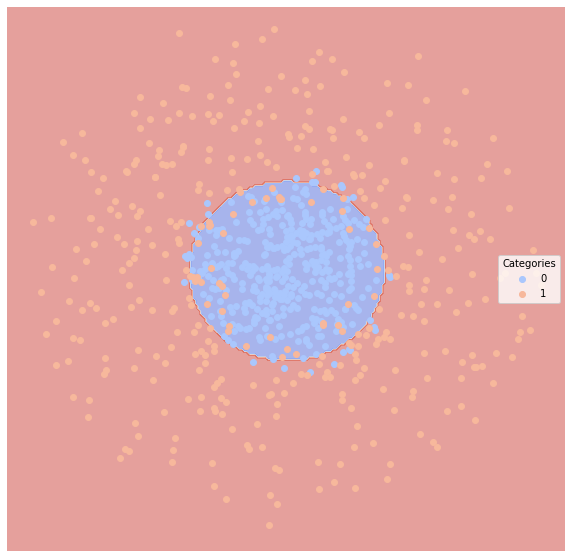

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.17  0.831949   0.783784           0.752981  0.896907
1               0.17  0.831949   0.887640           0.800812  0.766990


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


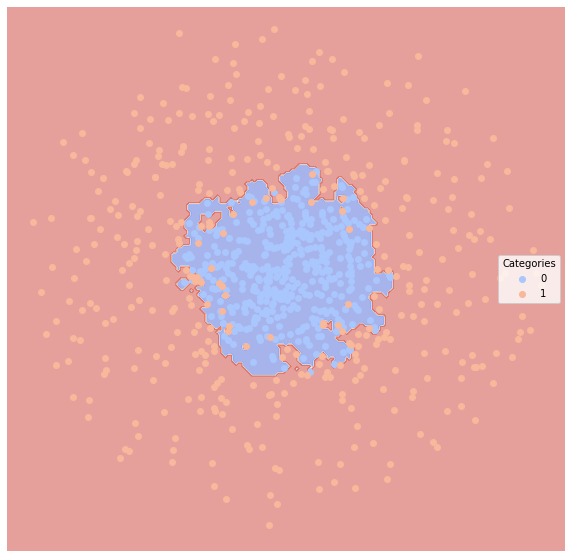

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.465  0.539836   0.515152           0.506137  0.701031
1              0.465  0.539836   0.573529           0.537162  0.378641


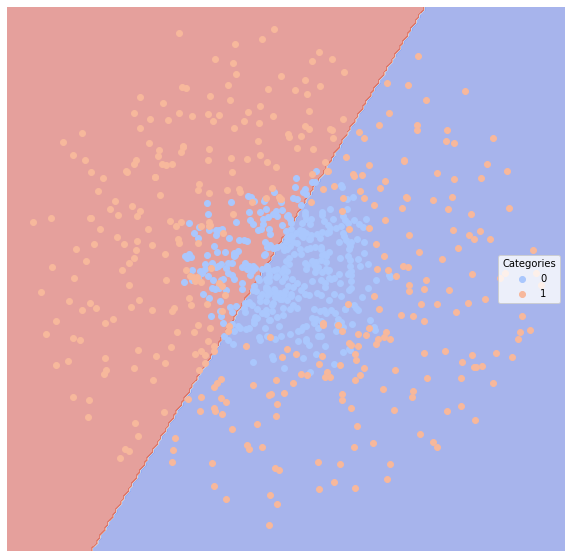

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.175  0.826194   0.792453           0.751248  0.865979
1              0.175  0.826194   0.861702           0.787649  0.786408


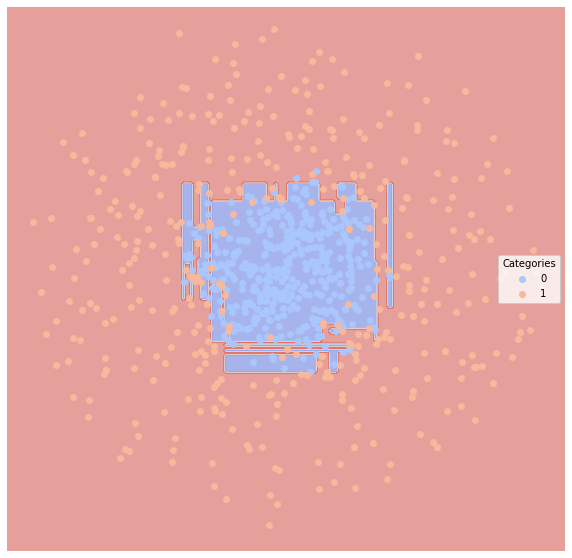

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.165  0.837103   0.785714           0.757813  0.907216
1              0.165  0.837103   0.897727           0.808548  0.766990


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


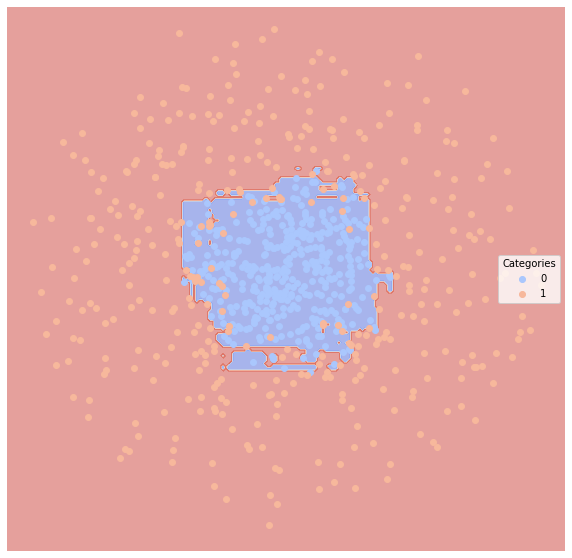

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


C:\Users\qmun\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.155  0.847413   0.789474           0.767501  0.927835
1              0.155  0.847413   0.918605           0.824561  0.766990


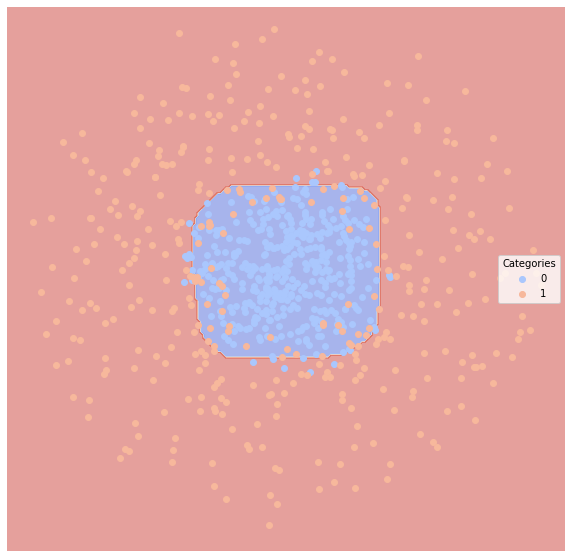

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.16  0.841657   0.798165           0.765880  0.896907
1               0.16  0.841657   0.890110           0.809989  0.786408


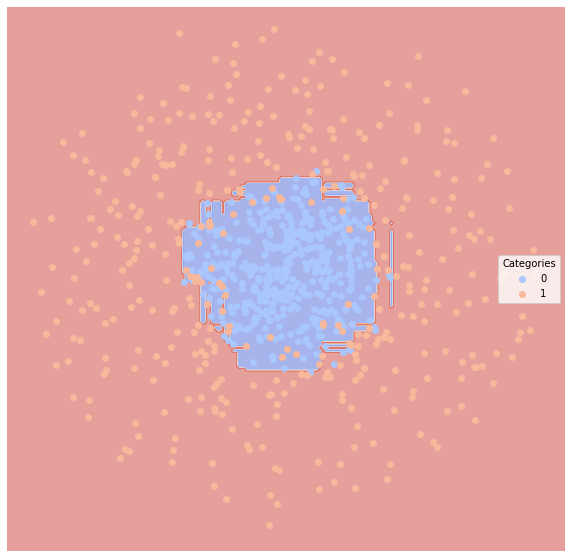

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Random
GaussianNB(priors=None, var_smoothing=1e-09)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.52  0.494787   0.440945           0.442448  0.629213
1               0.52  0.494787   0.547945           0.552458  0.360360


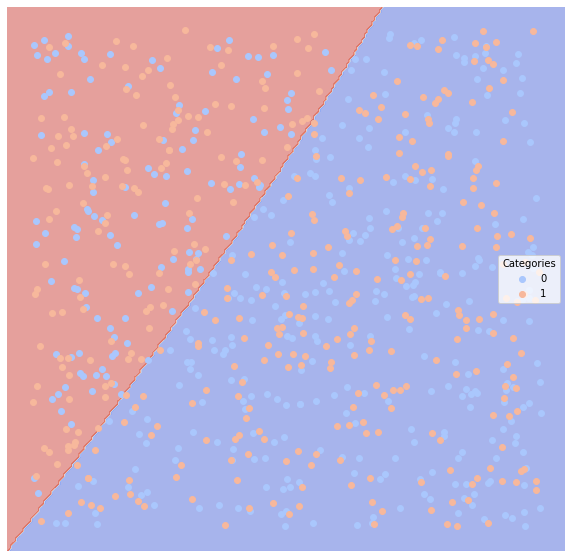

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.49  0.516247   0.459459           0.453286  0.573034
1               0.49  0.516247   0.573034           0.563286  0.459459


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


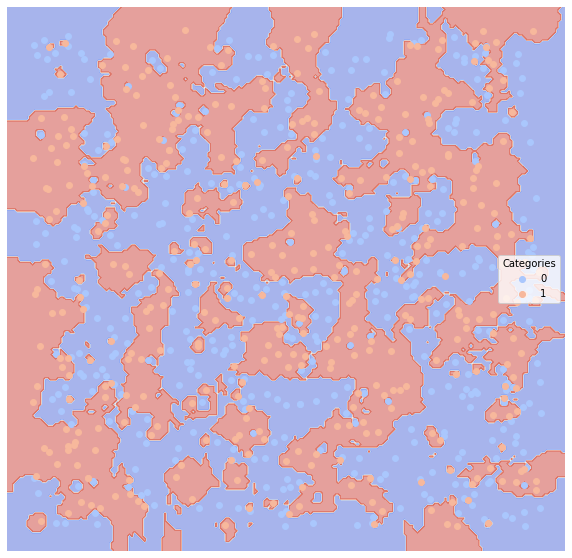

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.51  0.504909   0.448819           0.447446  0.640449
1               0.51  0.504909   0.561644           0.557454  0.369369


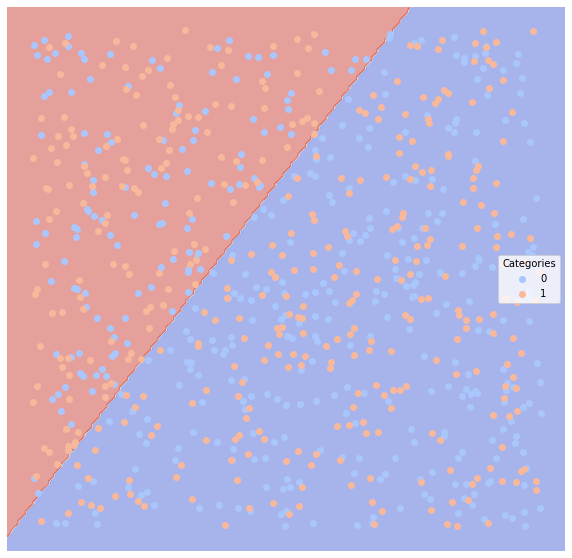

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.52  0.483652   0.429907           0.437199  0.516854
1               0.52  0.483652   0.537634           0.547178  0.450450

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


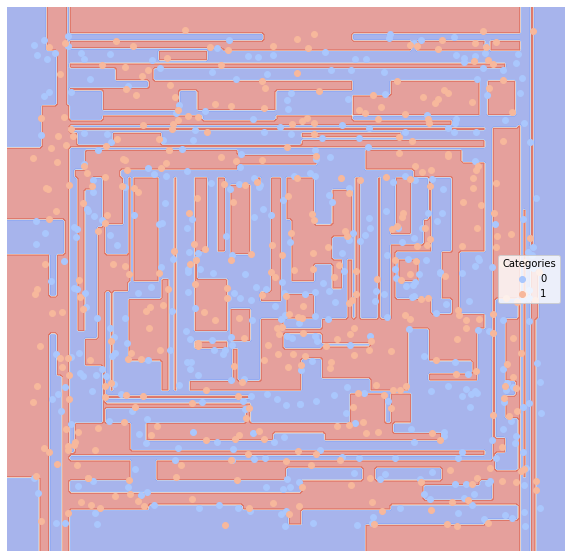

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.505  0.506073     0.4500           0.448034  0.606742
1              0.505  0.506073     0.5625           0.558041  0.405405


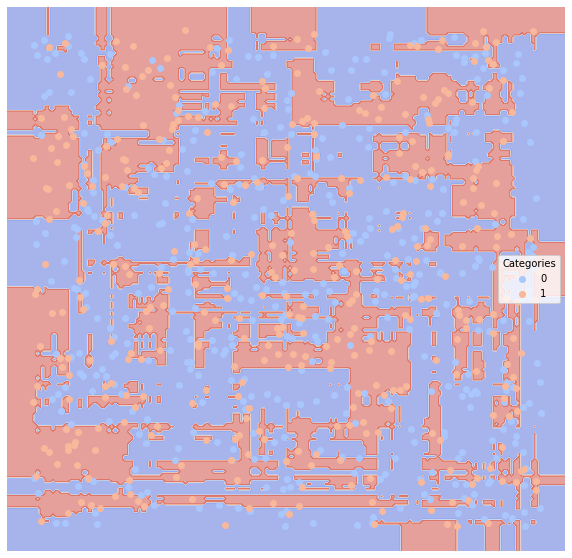

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.515  0.491497   0.437500           0.440871  0.550562
1              0.515  0.491497   0.545455           0.550872  0.432432


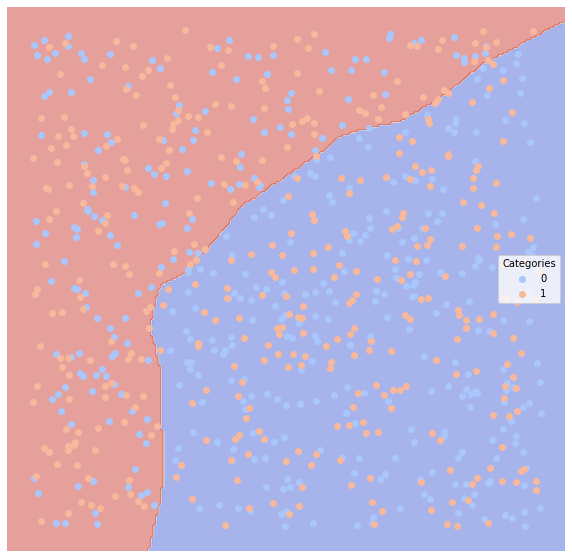

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.51  0.501569   0.446281           0.445777  0.606742
1               0.51  0.501569   0.556962           0.555778  0.396396


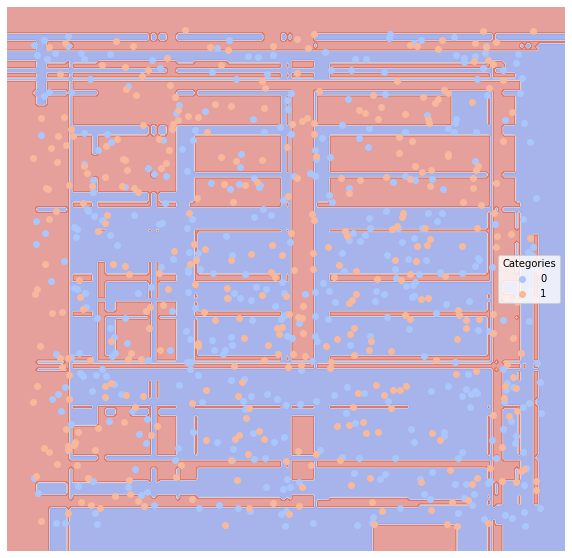

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Random
GaussianNB(priors=None, var_smoothing=1e-09)
          Error_Rate    AUC  Precision  Average_Precision  Recall
Category                                                         
0              0.525  0.475   0.474227           0.488144    0.46
1              0.525  0.475   0.475728           0.488107    0.49


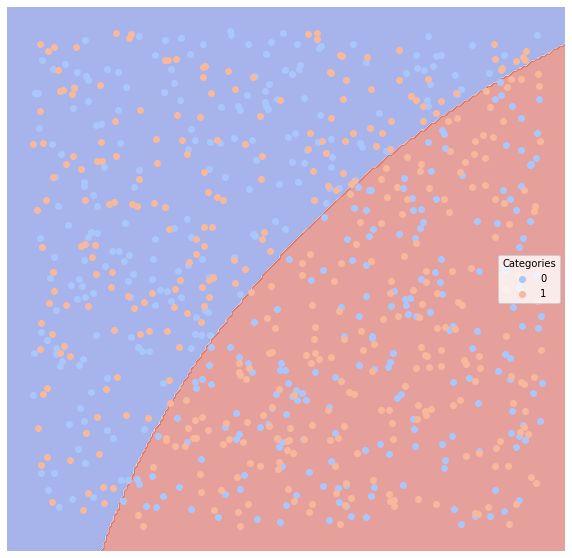

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')
          Error_Rate   AUC  Precision  Average_Precision  Recall
Category                                                        
0               0.49  0.51       0.51             0.5051    0.51
1               0.49  0.51       0.51             0.5051    0.51


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


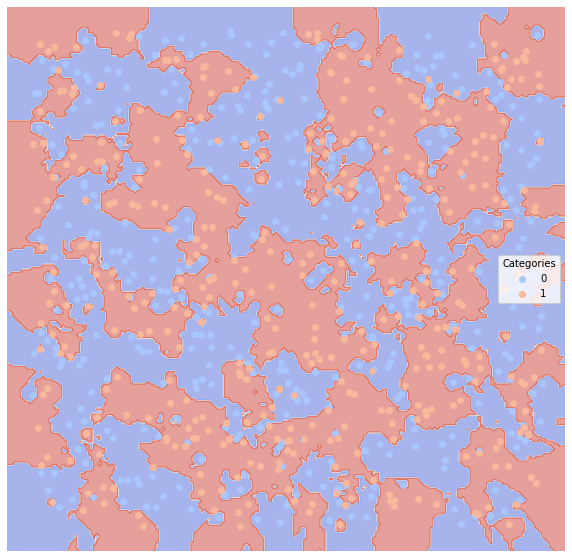

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
          Error_Rate   AUC  Precision  Average_Precision  Recall
Category                                                        
0               0.51  0.49   0.490196           0.495098    0.50
1               0.51  0.49   0.489796           0.495102    0.48


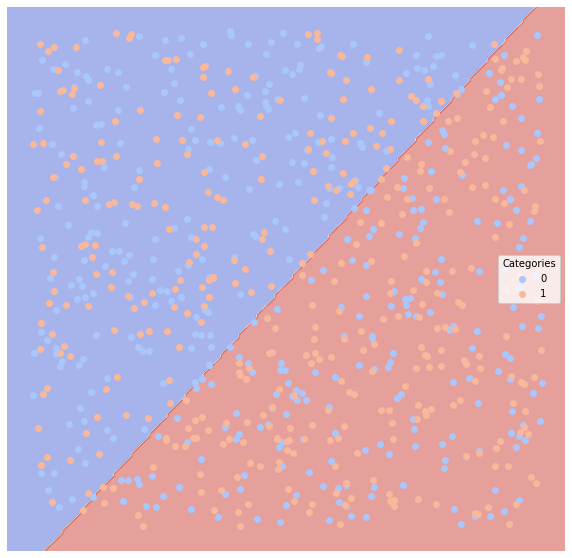

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
          Error_Rate    AUC  Precision  Average_Precision  Recall
Category                                                         
0              0.425  0.575   0.570093           0.542757    0.61
1              0.425  0.575   0.580645           0.543548    0.54


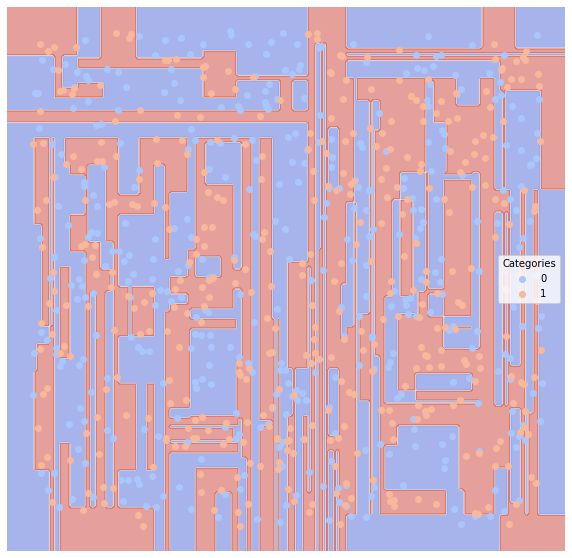

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
          Error_Rate    AUC  Precision  Average_Precision  Recall
Category                                                         
0              0.485  0.515      0.512            0.50768    0.64
1              0.485  0.515      0.520            0.50780    0.39


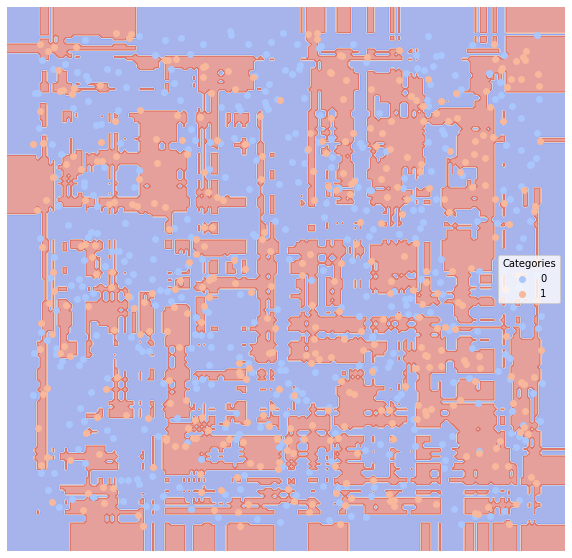

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
          Error_Rate   AUC  Precision  Average_Precision  Recall
Category                                                        
0               0.52  0.48   0.480769           0.490385    0.50
1               0.52  0.48   0.479167           0.490417    0.46


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


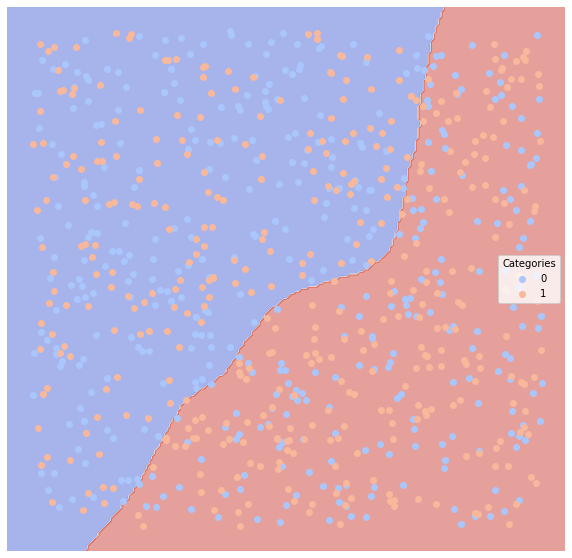

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
          Error_Rate    AUC  Precision  Average_Precision  Recall
Category                                                         
0              0.515  0.485   0.481481           0.492778    0.39
1              0.515  0.485   0.487395           0.492689    0.58


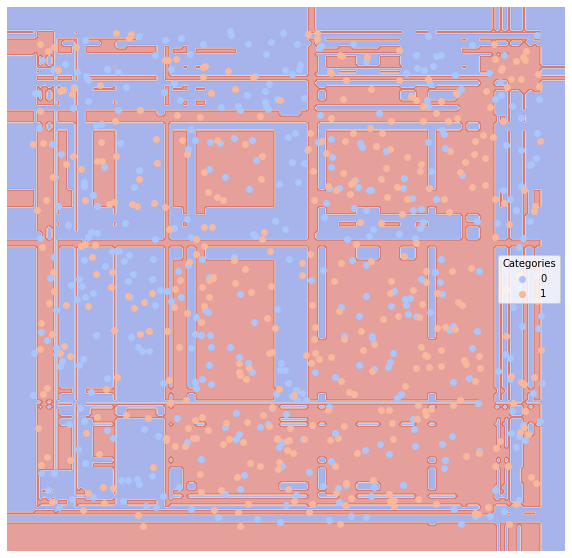

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


AndSplit
GaussianNB(priors=None, var_smoothing=1e-09)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.11  0.890501   0.871287           0.835446  0.907216
1               0.11  0.890501   0.909091           0.859351  0.873786


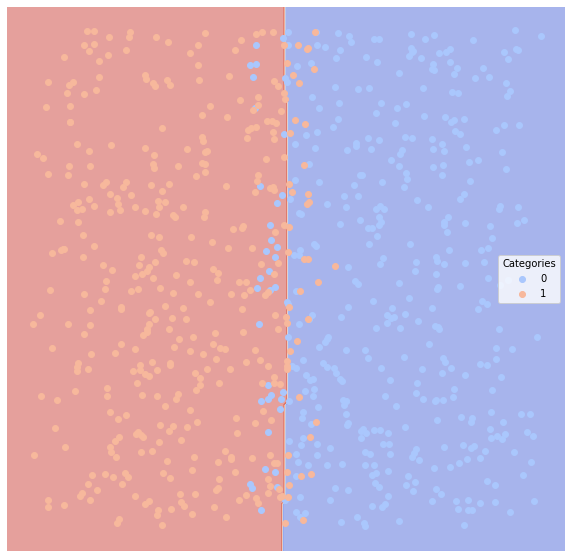

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.14  0.858973   0.879121           0.810048  0.824742
1               0.14  0.858973   0.844037           0.808897  0.893204


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


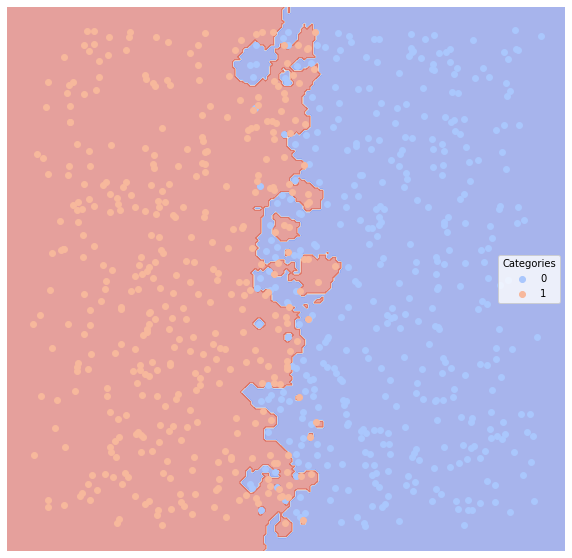

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
          Error_Rate      AUC  Precision  Average_Precision    Recall
Category                                                             
0                0.1  0.90051   0.881188           0.848513  0.917526
1                0.1  0.90051   0.919192           0.872102  0.883495


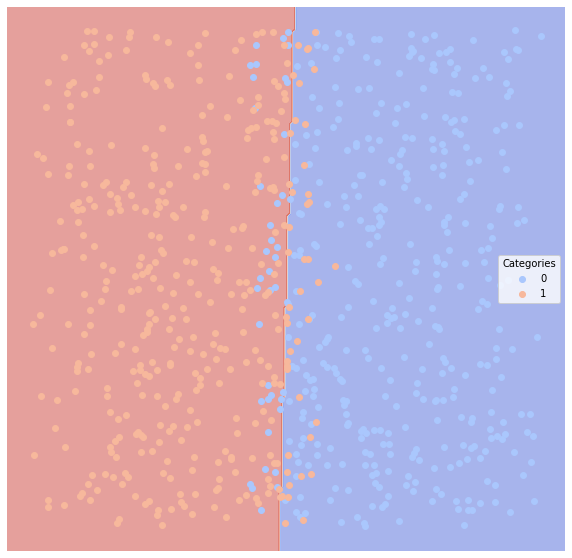

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.13  0.870183   0.858586           0.812369  0.876289
1               0.13  0.870183   0.881188           0.831415  0.864078


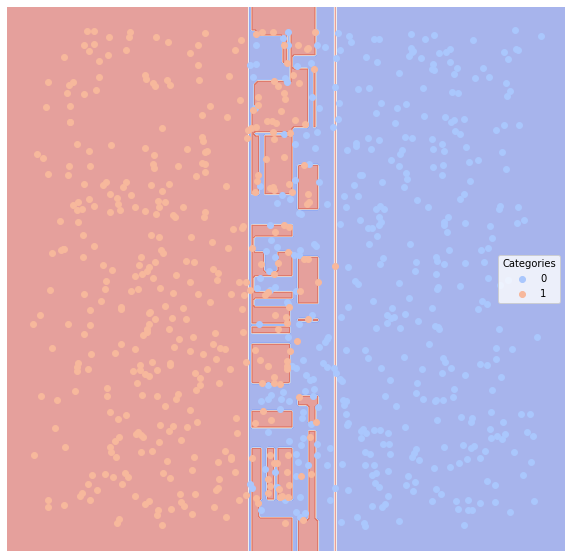

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.125  0.875938   0.846154           0.812645  0.907216
1              0.125  0.875938   0.906250           0.845473  0.844660


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


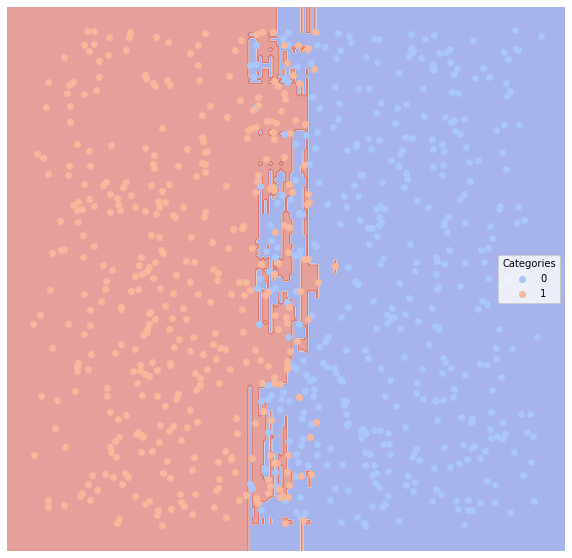

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


          Error_Rate      AUC  Precision  Average_Precision    Recall
Category                                                             
0                0.1  0.90051   0.881188           0.848513  0.917526
1                0.1  0.90051   0.919192           0.872102  0.883495


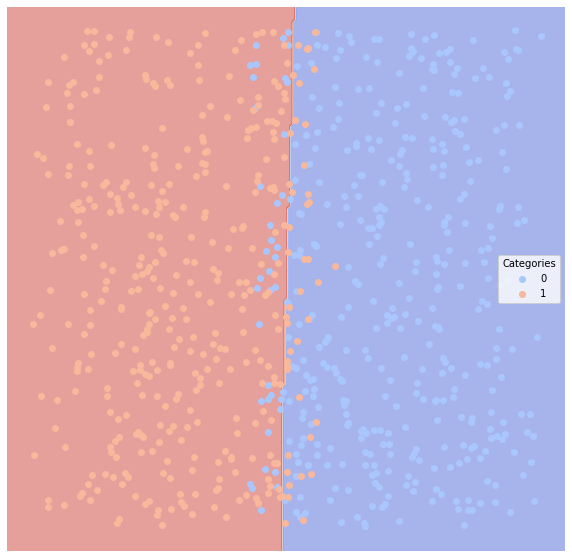

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.105  0.895356       0.88           0.843351  0.907216
1              0.105  0.895356       0.91           0.863981  0.883495


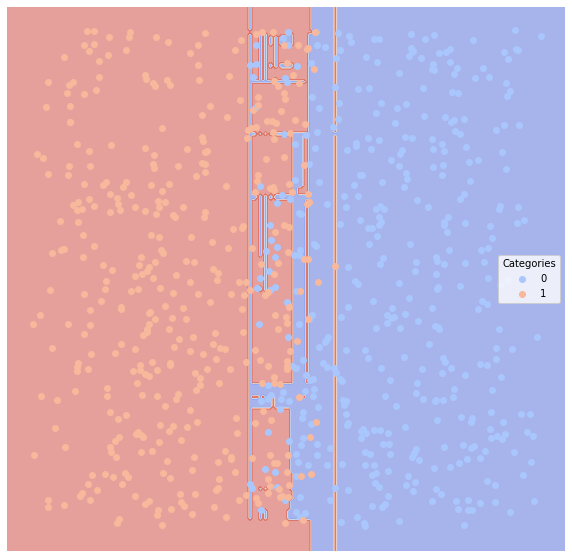

multiblobs
GaussianNB(priors=None, var_smoothing=1e-09)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.004  0.994210   0.990991           0.984063  0.990991
1              0.018  0.962642   0.965116           0.912052  0.932584
2              0.004  0.993449   0.989362           0.980837  0.989362
3              0.000  1.000000   1.000000           1.000000  1.000000
4              0.018  0.977092   0.940000           0.916928  0.969072


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

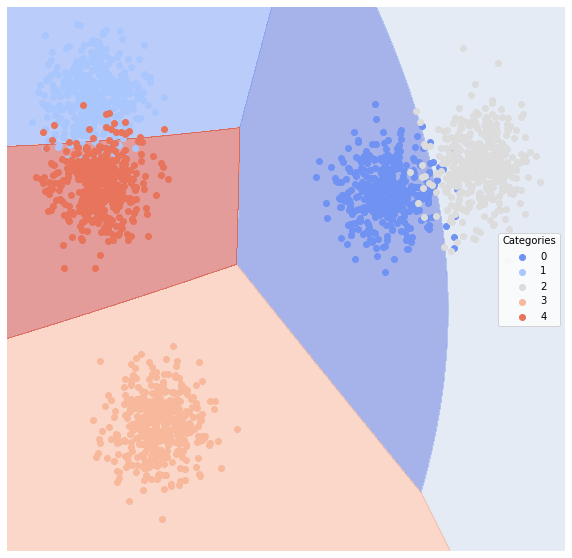

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.008  0.988420   0.981982           0.968289  0.981982
1              0.020  0.965827   0.943820           0.900797  0.943820
2              0.008  0.986899   0.978723           0.961900  0.978723
3              0.000  1.000000   1.000000           1.000000  1.000000
4              0.020  0.968023   0.948454           0.909564  0.948454


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

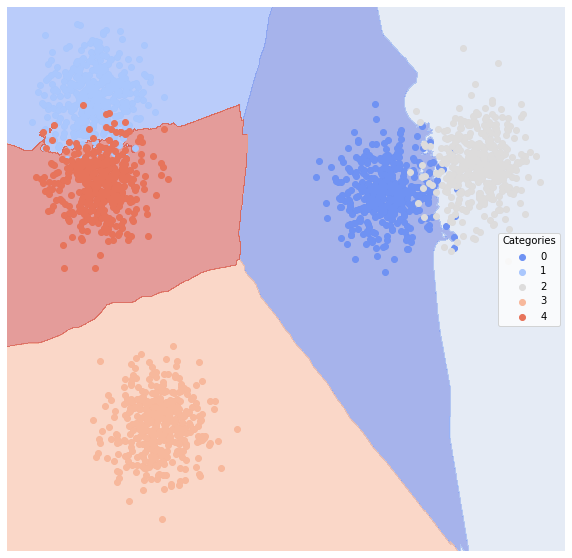

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.012  0.976192   0.990654           0.956030  0.954955
1              0.020  0.974630   0.924731           0.899560  0.966292
2              0.012  0.988523   0.948980           0.940884  0.989362
3              0.000  1.000000   1.000000           1.000000  1.000000
4              0.020  0.960195   0.967742           0.911905  0.927835


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

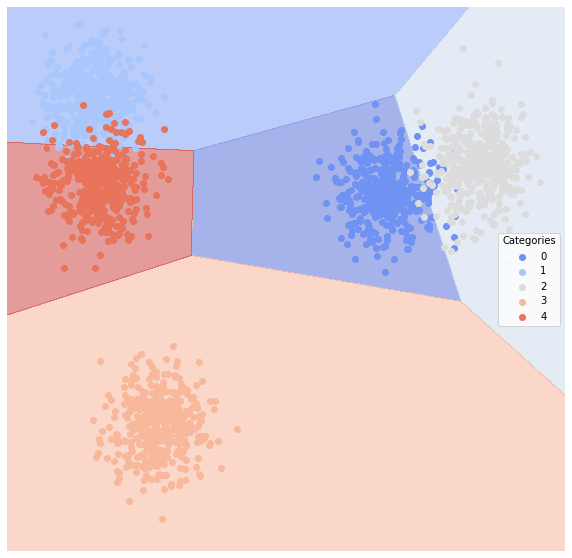

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.008  0.988420   0.981982           0.968289  0.981982
1              0.030  0.950942   0.911111           0.853451  0.921348
2              0.008  0.986899   0.978723           0.961900  0.978723
3              0.000  1.000000   1.000000           1.000000  1.000000
4              0.030  0.950078   0.927083           0.866623  0.917526


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

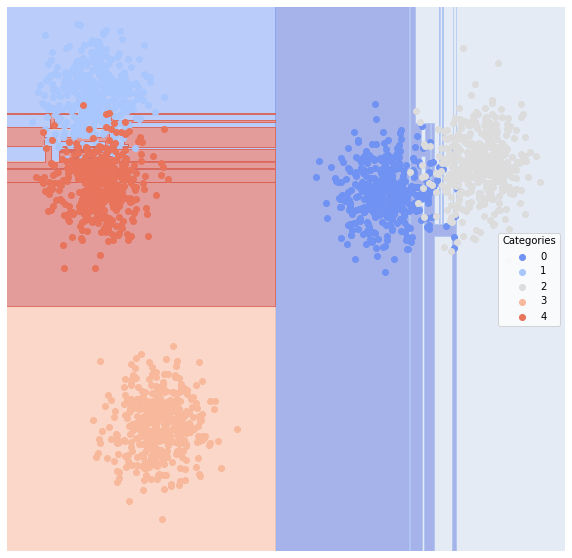

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.008  0.988420   0.981982           0.968289  0.981982
1              0.028  0.956560   0.912088           0.862599  0.932584
2              0.008  0.986899   0.978723           0.961900  0.978723
3              0.000  1.000000   1.000000           1.000000  1.000000
4              0.028  0.951319   0.936842           0.875577  0.917526


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

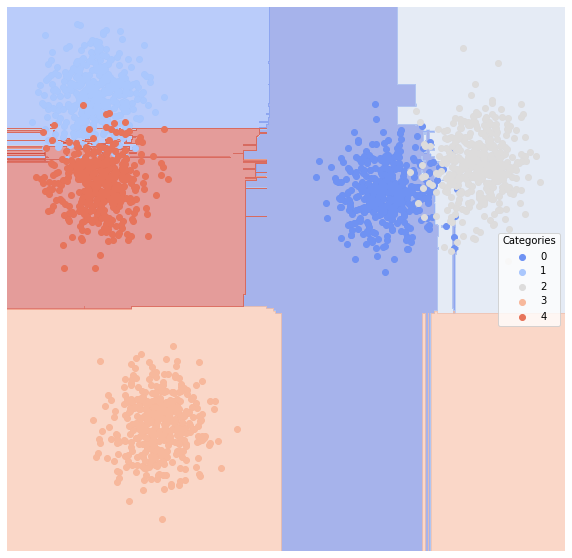

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.006  0.992925   0.982143           0.975295  0.990991
1              0.016  0.968260   0.965517           0.921275  0.943820
2              0.006  0.988130   0.989247           0.972199  0.978723
3              0.000  1.000000   1.000000           1.000000  1.000000
4              0.016  0.978333   0.949495           0.926129  0.969072


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

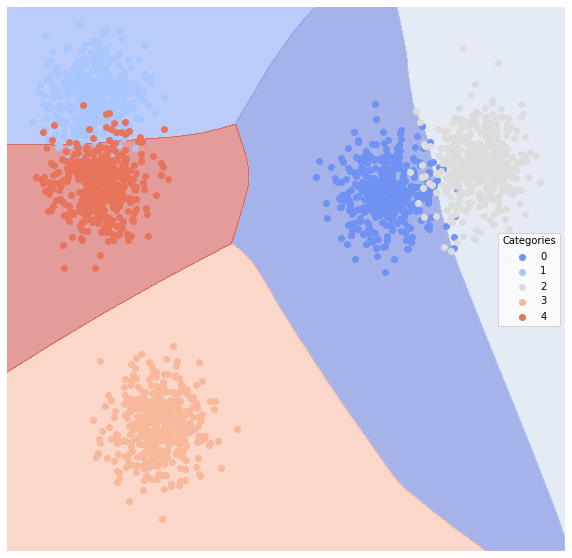

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.012  0.979411   0.981651           0.954277  0.963964
1              0.030  0.946540   0.920455           0.853717  0.910112
2              0.012  0.984436   0.95833

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

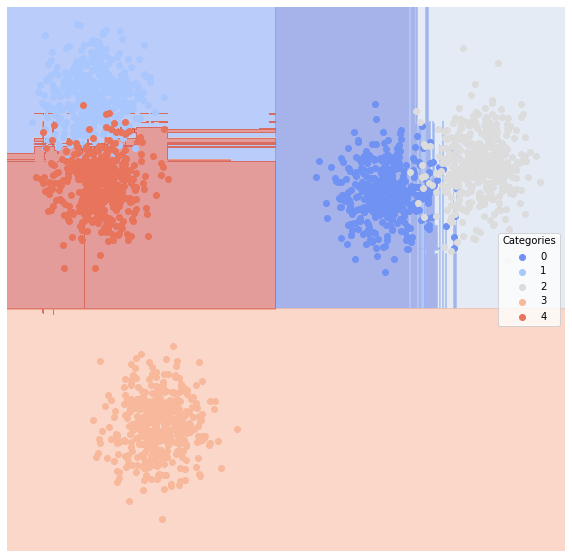

In [54]:
# Make 10 artificial datasets, each by applying seven models to it
i = 0
while i < 10:
    plt_artificial_datasets()
    i += 1

In the above cell, I generated 10 artifical datasets by randomly selected one of the five functions provided (random, xorSplit, andSplit, targetsplit and multiBlobs). Then, I applied all seven models to evaluate all these models. 

Result has shown that for multiblobs, all models have a similarly small error_rate and pretty large AUC, precision and recall. Among all models, GaussianNB and Logistic Regression has a relatively better prediction than others.For taretsplit, GradientBoosting has the best prediction while Logistic Regression has the worst prediction which is far worse than other models. For andsplit, all models have similar predction rate. Logistic Regression and MLPClassifier works better than other models while DecisionTree functions the worst.

The similar approach also applies to other dataframe functions. For random, all functions have a relatively high error rate, among which KNeighbors work slightly better while GuassianNB and decision tree functions slightly worse. Xorsplit is not shown in the above mentioned 10 examples. However,in other data, it is shown that Gradient Bossting has the lowest error rate while KNN and Decision Tree generated a relatively higher error rate.


### Empirical datasets

#### Reddit

In [73]:
# It seems that because of the directory problem that functions in existing package don't work.
def loadReddit():
    dataDirectory = 'data/'
    redditDf = pandas.read_csv(os.path.join(dataDirectory,'reddit.csv'))
    redditDf = redditDf.dropna()
    redditDf['category'] = [s.split(':')[0] for s in redditDf['subreddit']]
    generateVecs = lucem_illud_2020.generateVecs(redditDf)
    dfTrain, dfTest = lucem_illud_2020.trainTestSplit(generateVecs)
    return dfTrain, dfTest

In [74]:
dfTrain, dfTest = loadReddit()

In [79]:
def plt_empirical_datasets(dfTrain, dfTest):
    # I omitted MLP and Gradient Boosting here, because it is super slow here.
    ls_clf = [sklearn.naive_bayes.GaussianNB(), sklearn.neighbors.KNeighborsClassifier(5, weights='distance'),
           sklearn.linear_model.LogisticRegression(), sklearn.tree.DecisionTreeClassifier(),
           sklearn.ensemble.RandomForestClassifier()]
    for clf in ls_clf:
        print(clf)
        clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
        print(lucem_illud_2020.evaluateClassifier(clf, dfTest))
        #lucem_illud_2020.plotConfusionMatrix(clf, dfTest) # Can remove the uncomment for drawing confusion matrix
        #lucem_illud_2020.plotMultiROC(clf, dfTest) # Can remove the uncomment for drawing AUC
        #lucem_illud_2020.plotregions(clf, dfTrain) # Can remove the uncomment for plotting regions

In [80]:
plt_empirical_datasets(dfTrain, dfTest)

GaussianNB(priors=None, var_smoothing=1e-09)
                         Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                      
Weeaboo Tales              0.181818  0.858053   0.565574           0.543033   
Tales From Tech Support    0.072100  0.894102   0.939024           0.817530   
Bad Roommates              0.153605  0.759602   0.730159           0.530920   
Relationships              0.150470  0.735549   0.730769           0.492267   

                           Recall  
Category                           
Weeaboo Tales            0.932432  
Tales From Tech Support  0.810526  
Bad Roommates            0.589744  
Relationships            0.527778  
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')
                         Error_Rate       AUC  Precision  Average_Precision 

For reddit, apparently the Logistic Regression model performs far beyond other models and the Guassian NB performs worst among all models.

#### News

In [81]:
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadNewsGroups())

Loading data for: comp.sys.mac.hardware
Loading data for: comp.windows.x
Loading data for: misc.forsale
Loading data for: rec.autos
Converting to vectors


In [82]:
plt_empirical_datasets(dfTrain, dfTest)

GaussianNB(priors=None, var_smoothing=1e-09)
                       Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                    
rec.autos                0.082979  0.874525   0.858491           0.730391   
misc.forsale             0.127660  0.809675   0.766990           0.603485   
comp.sys.mac.hardware    0.172340  0.791190   0.646617           0.535749   
comp.windows.x           0.072340  0.915833   0.835938           0.773037   

                         Recall  
Category                         
rec.autos              0.791304  
misc.forsale           0.686957  
comp.sys.mac.hardware  0.716667  
comp.windows.x         0.891667  
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')
                       Error_Rate       AUC  Precision  Average_Precision  \
Category               

For news, Logistic Regression and GaussianNB performs similarly excellent while KNN performs worst with an error rate of more than 0.5.

#### Senate (Small)

In [83]:
def loadSenate():
    dataDirectory = 'data/'
    senReleasesDF = pandas.read_csv(os.path.join(dataDirectory, "ObamaClintonReleases.csv"), index_col=0)
    senReleasesDF = senReleasesDF.dropna(axis=0, how='any')

    senReleasesDF['category'] = senReleasesDF['targetSenator']
    print("Converting to vectors")
    generateVecs = lucem_illud_2020.generateVecs(senReleasesDF)
    dfTrain, dfTest = lucem_illud_2020.trainTestSplit(generateVecs)
    return dfTrain, dfTest

In [84]:
dfTrain, dfTest = loadSenate()

Converting to vectors


In [85]:
plt_empirical_datasets(dfTrain, dfTest)

GaussianNB(priors=None, var_smoothing=1e-09)
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
Clinton     0.155425  0.829546   0.840183           0.818101  0.910891
Obama       0.155425  0.829546   0.852459           0.740450  0.748201
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
Clinton     0.120235  0.878321   0.908629           0.872620  0.886139
Obama       0.120235  0.878321   0.840278           0.784251  0.870504
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, p

As is shown here, each model works pretty well for Senator data. It seems that Decision Tree performs the best at an error rate of 0.002 while GaussianNB performs the worse.

Note: I don't apply it to the email as I got abundant errors when import data into it because the directory.

#### Trying a new model

In [91]:
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise))

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.04  0.959964   0.958763           0.939226  0.958763
1               0.04  0.959964   0.961165           0.943838  0.961165


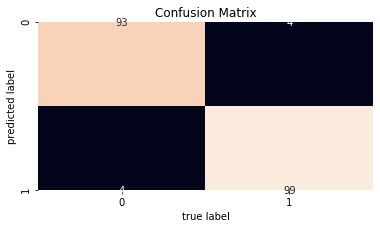

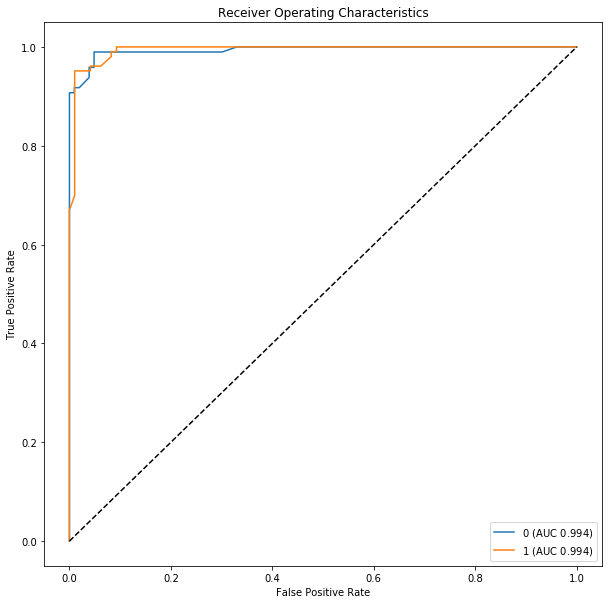

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


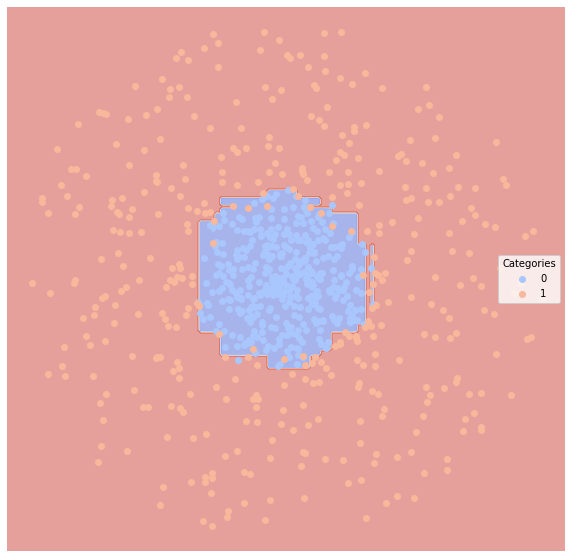

In [96]:
clf = sklearn.ensemble.AdaBoostClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
print(lucem_illud_2020.evaluateClassifier(clf, dfTest))
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
lucem_illud_2020.plotMultiROC(clf, dfTest)
lucem_illud_2020.plotregions(clf, dfTrain)

In [97]:
dfTrain, dfTest = loadReddit()

                         Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                      
Weeaboo Tales              0.012539  0.983453   0.975309           0.957497   
Tales From Tech Support    0.040752  0.954891   0.887500           0.852706   
Bad Roommates              0.075235  0.881297   0.917808           0.779875   
Relationships              0.065831  0.926083   0.835294           0.782275   

                           Recall  
Category                           
Weeaboo Tales            0.975309  
Tales From Tech Support  0.946667  
Bad Roommates            0.788235  
Relationships            0.910256  


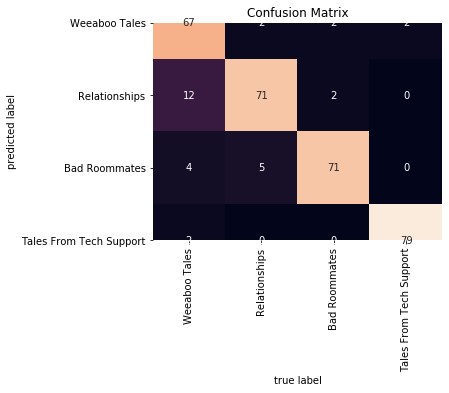

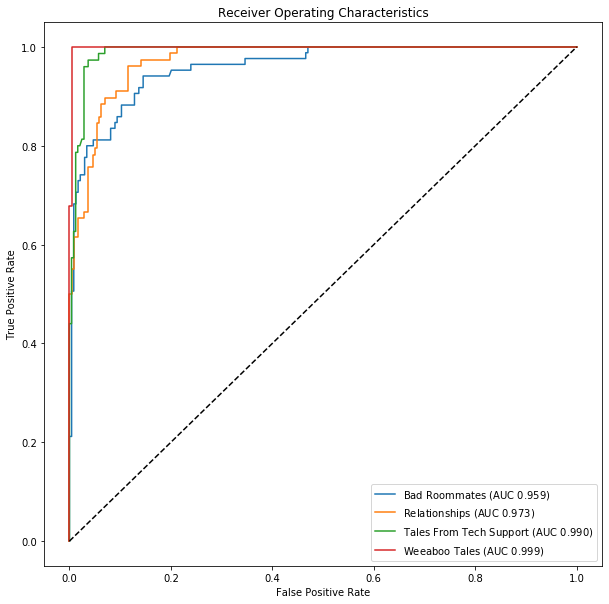

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

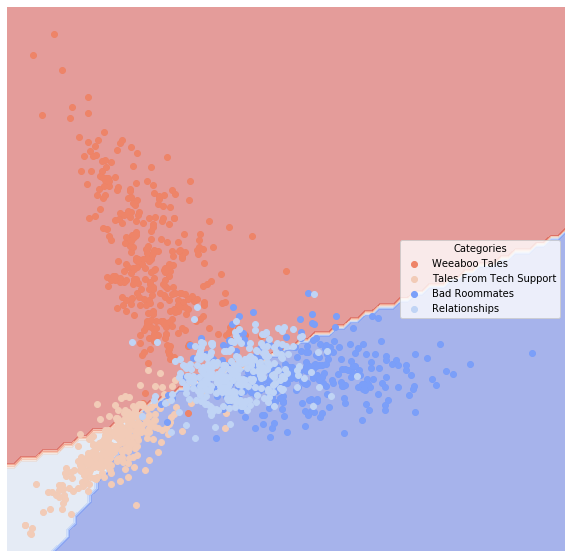

In [98]:
clf = sklearn.ensemble.AdaBoostClassifier()
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])
print(lucem_illud_2020.evaluateClassifier(clf, dfTest))
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)
lucem_illud_2020.plotMultiROC(clf, dfTest)
lucem_illud_2020.plotregions(clf, dfTrain)

We use new identifier AdaBoost Classifier and applies it to targetsplit and Reddit data. It shows that it has a relatively fine error rate compared with other models, with an error rate of 0.04 to artificial data and around 0.01-0.07 to real data.

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">In the cells immediately following, perform Logistic and Naïve Bayes classification (binary or multinomial) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. How do these classifiers perform? Exrapolate codes from these models to all uncoded data.


First, we load a csv into the pandas DataFrame with its several features and lyrics web scraping from lyrics website.

In [136]:
df_lyrics = pd.read_csv("top_songs_no_sentiments.csv")
df_lyrics = df_lyrics.drop(df_lyrics.columns[[0,1]], axis=1)
df_lyrics.dropna(inplace=True)
print(df_lyrics.shape)
df_lyrics.head()

(523, 15)


title      artist        top genre  year  bpm  nrgy  dnce  \
0      Hey, Soul Sister       Train       neo mellow  2010   97    89    67   
1  Love The Way You Lie      Eminem  detroit hip hop  2010   87    93    75   
2               TiK ToK       Kesha        dance pop  2010  120    84    76   
3           Bad Romance   Lady Gaga        dance pop  2010  119    92    70   
4  Just the Way You Are  Bruno Mars              pop  2010  109    84    64   

   dB  live  val  dur  acous  spch   pop  \
0  -4     8   80  217     19     4  83.0   
1  -5    52   64  263     24    23  82.0   
2  -3    29   71  200     10    14  80.0   
3  -4     8   71  295      0     4  79.0   
4  -5     9   43  221      2     4  78.0   

                                              lyrics  
0  \n\n[Intro]\nHeyy\nHeeey\nHeey\n\n[Verse 1]\nY...  
1  \n\n[Chorus: Rihanna]\nJust gonna stand there ...  
2  \n\n[Verse 1]\nWake up in the morning feelin' ...  
3  \n\n[Intro]\nOh-oh-oh-oh-oh-oh-oh-oh-oh-oh-oh-...  
4  \n\n[Verse 1]\nOh, her eyes, her eyes\nMake th...

In [137]:
df_lyrics['tokenized_text'] = df_lyrics['lyrics'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
df_lyrics['normalized_text'] = df_lyrics['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [144]:
# Set our category data: year (year <= 2014: 0, year > 2014:1)
# We use this dependent variable to determine which word would appear in a more modern/old song
df_lyrics['category'] = df_lyrics['year'].apply(lambda x: int(x> 2014))

In [147]:
df_lyrics.head()

title      artist        top genre  year  bpm  nrgy  dnce  \
0      Hey, Soul Sister       Train       neo mellow  2010   97    89    67   
1  Love The Way You Lie      Eminem  detroit hip hop  2010   87    93    75   
2               TiK ToK       Kesha        dance pop  2010  120    84    76   
3           Bad Romance   Lady Gaga        dance pop  2010  119    92    70   
4  Just the Way You Are  Bruno Mars              pop  2010  109    84    64   

   dB  live  val  dur  acous  spch   pop  \
0  -4     8   80  217     19     4  83.0   
1  -5    52   64  263     24    23  82.0   
2  -3    29   71  200     10    14  80.0   
3  -4     8   71  295      0     4  79.0   
4  -5     9   43  221      2     4  78.0   

                                              lyrics  \
0  \n\n[Intro]\nHeyy\nHeeey\nHeey\n\n[Verse 1]\nY...   
1  \n\n[Chorus: Rihanna]\nJust gonna stand there ...   
2  \n\n[Verse 1]\nWake up in the morning feelin' ...   
3  \n\n[Intro]\nOh-oh-oh-oh-oh-oh-oh-oh-oh-oh-oh-...   
4  \n\n[Verse 1]\nOh, her eyes, her eyes\nMake th...   

                                      tokenized_text  \
0  [Intro, Heyy, Heeey, Heey, Verse, 1, Your, lip...   
1  [Chorus, Rihanna, Just, gon, na, stand, there,...   
2  [Verse, 1, Wake, up, in, the, morning, feelin,...   
3  [Intro, Oh, oh, oh, oh, oh, oh, oh, oh, oh, oh...   
4  [Verse, 1, Oh, her, eyes, her, eyes, Make, the...   

                                     normalized_text  category  
0  [intro, heyy, heeey, heey, verse, lipstick, st...         0  
1  [chorus, rihanna, gon, na, stand, watch, burn,...         0  
2  [verse, wake, morning, feelin, like, p., diddy...         0  
3  [intro, oh, oh, oh, oh, oh, oh, oh, oh, oh, oh...         0  
4  [verse, oh, eye, eye, star, look, like, shinin...         0

In [148]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud_2020.trainTestSplit(df_lyrics, holdBackFraction=holdBackFraction)
print(len(train_ng_df))
print(len(test_ng_df))

419
104


In [154]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['lyrics'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]
TFVects_test = TFVectorizer_ng.transform(test_ng_df['lyrics'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#### Logistic Regression

In [155]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_ng_df['vect'], axis=0), train_ng_df['category'])
print(logistic.score(np.stack(train_ng_df['vect'], axis=0), train_ng_df['category']))

0.9212410501193318


In [156]:
print(logistic.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

0.6153846153846154


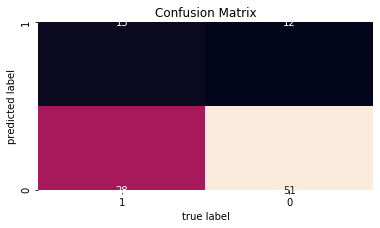

In [158]:
# Confusion Matrix
lucem_illud_2020.plotConfusionMatrix(logistic, test_ng_df)

In [159]:
train_ng_df['logistic_predict'] = logistic.predict(np.stack(train_ng_df['vect'], axis=0))
test_ng_df['logistic_predict'] = logistic.predict(np.stack(test_ng_df['vect'], axis=0))

In [162]:
print("Precision")
print(sklearn.metrics.precision_score(test_ng_df['category'], test_ng_df['logistic_predict']))
print("Recall:")
print(sklearn.metrics.recall_score(test_ng_df['category'], test_ng_df['logistic_predict']))
print("F1 score")
print(sklearn.metrics.f1_score(test_ng_df['category'], test_ng_df['logistic_predict']))

Precision
0.6455696202531646
Recall:
0.8095238095238095
F1 score
0.7183098591549295


In [164]:
lucem_illud_2020.metrics.evaluateClassifier(logistic, test_ng_df)

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0           0.384615  0.563298    0.52000           0.434109  0.317073
1           0.384615  0.563298    0.64557           0.637989  0.809524

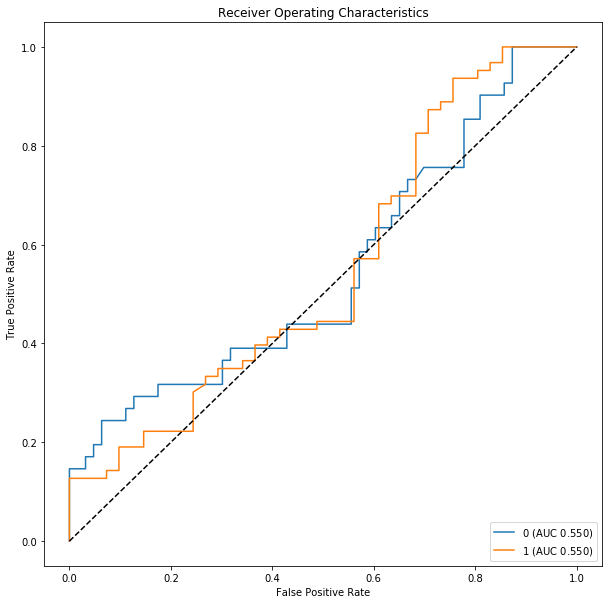

In [165]:
lucem_illud_2020.plotMultiROC(logistic, test_ng_df)

#### Naive Bayes

In [166]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_ng_df['vect'], axis=0), train_ng_df['category'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [168]:
print("Training:")
print(naiveBayes.score(np.stack(train_ng_df['vect'], axis=0), train_ng_df['category']))
print("Testing:")
print(naiveBayes.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Training:
0.964200477326969
Testing:
0.6442307692307693


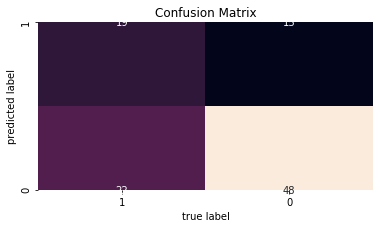

In [171]:
test_ng_df['nb_predict'] = naiveBayes.predict(np.stack(test_ng_df['vect'], axis=0))
lucem_illud_2020.plotConfusionMatrix(naiveBayes, test_ng_df)

In [172]:
print("Precision")
print(sklearn.metrics.precision_score(test_ng_df['category'], test_ng_df['nb_predict']))
print("Recall:")
print(sklearn.metrics.recall_score(test_ng_df['category'], test_ng_df['nb_predict']))
print("F1 score")
print(sklearn.metrics.f1_score(test_ng_df['category'], test_ng_df['nb_predict']))

Precision
0.6857142857142857
Recall:
0.7619047619047619
F1 score
0.7218045112781954


In [173]:
lucem_illud_2020.metrics.evaluateClassifier(naiveBayes, test_ng_df)

Error_Rate      AUC  Precision  Average_Precision    Recall
Category                                                             
0           0.355769  0.61266   0.558824           0.470505  0.463415
1           0.355769  0.61266   0.685714           0.666680  0.761905

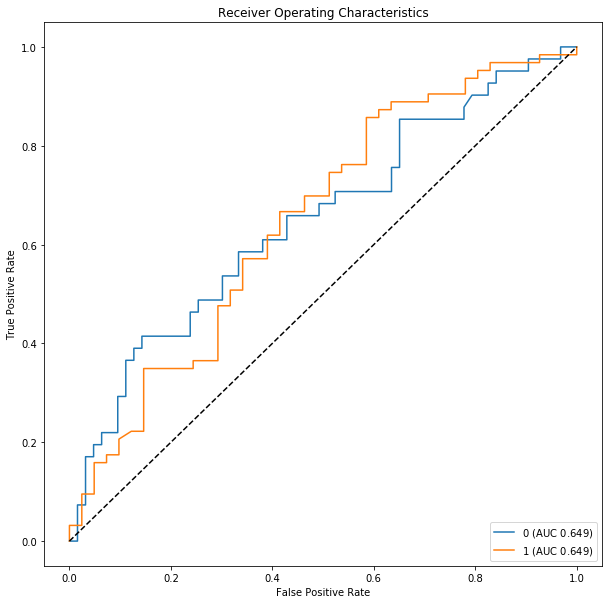

In [174]:
lucem_illud_2020.plotMultiROC(naiveBayes, test_ng_df)

Both Logistic and Naive Bayes achieve small error in training set but have large errors in test set, and it seems that both of them are overfitting. Comparatively speaking, Naive Bayes function slightly better than logistic models.

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

#### Decision Tree

In [176]:
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(train_ng_df['vect'], axis =0), train_ng_df['category'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


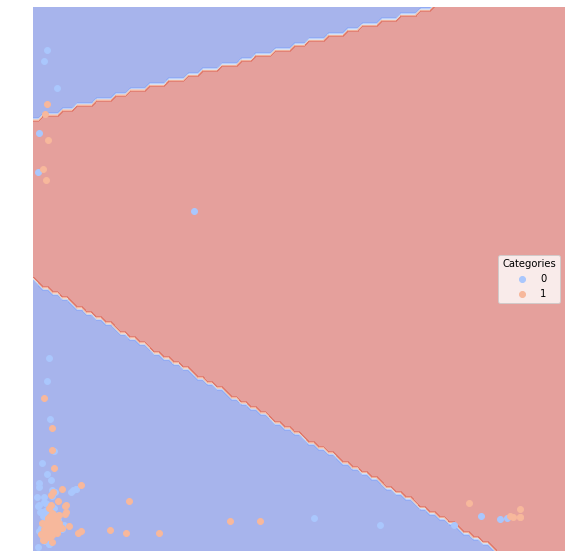

In [178]:
lucem_illud_2020.plotregions(clf_tree, train_ng_df)

In [179]:
lucem_illud_2020.evaluateClassifier(clf_tree, test_ng_df)

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0           0.413462  0.548006   0.468750           0.421494  0.365854
1           0.413462  0.548006   0.638889           0.629952  0.730159

In [180]:
print('Accuracy:')
print(sklearn.metrics.accuracy_score(test_ng_df['category'],clf_tree.predict(np.stack(test_ng_df['vect'], axis = 0))))
print('Precision:')
print(sklearn.metrics.precision_score(test_ng_df['category'],clf_tree.predict(np.stack(test_ng_df['vect'], axis = 0)), average = 'weighted'))
print('Recall:')
print(sklearn.metrics.recall_score(test_ng_df['category'],clf_tree.predict(np.stack(test_ng_df['vect'], axis = 0)), average = 'weighted'))
print('F-measures:')
print(sklearn.metrics.f1_score(test_ng_df['category'],clf_tree.predict(np.stack(test_ng_df['vect'], axis = 0)), average = 'weighted'))

Accuracy:
0.5865384615384616
Precision:
0.5718149038461539
Recall:
0.5865384615384616
F-measures:
0.57483315770987


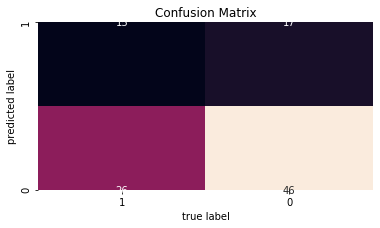

In [181]:
lucem_illud_2020.plotConfusionMatrix(clf_tree, test_ng_df)

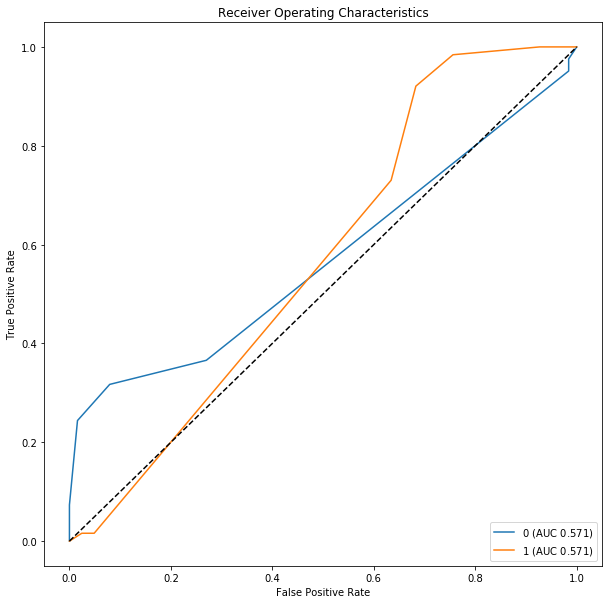

In [182]:
lucem_illud_2020.plotMultiROC(clf_tree, test_ng_df)

Generally speaking, tree didn't perform pretty well in the test dataset, and it might because of the overfitting.

#### Random Forest

In [184]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10)
bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) 
bag.fit(np.stack(train_ng_df['vect'], axis =0), train_ng_df['category'])

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=10,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
      

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


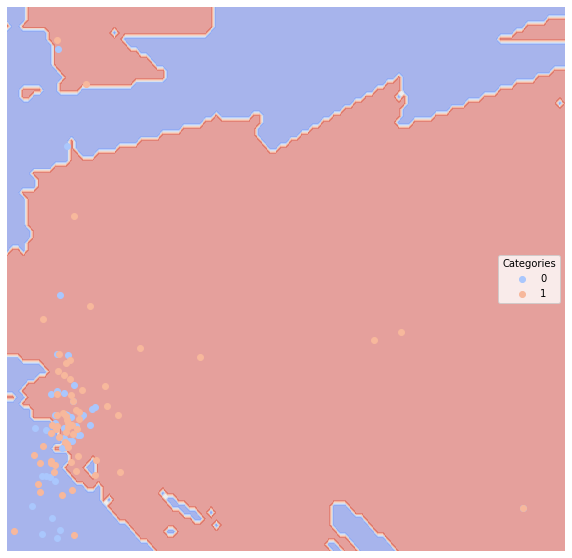

In [185]:
lucem_illud_2020.plotregions(bag, test_ng_df)

In [186]:
lucem_illud_2020.evaluateClassifier(bag, test_ng_df)

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0           0.423077  0.544328   0.457143           0.418782  0.390244
1           0.423077  0.544328   0.637681           0.628057  0.698413

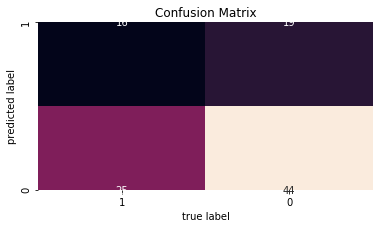

In [187]:
lucem_illud_2020.plotConfusionMatrix(bag, test_ng_df)

Random Forest performs similarly as bad as the decision tree, and it might because of the overfitting as well.

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Articulate how the *k*-nearest neighbor approach relates to *k*-means clustering explored in ***week 3***?

#### KNN

In [188]:
n_neighbors = 5
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

In [191]:
clf_knearest.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])
lucem_illud_2020.evaluateClassifier(clf_knearest, train_ng_df)

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0           0.264916  0.729268   0.711864           0.625429  0.677419
1           0.264916  0.729268   0.752066           0.709169  0.781116

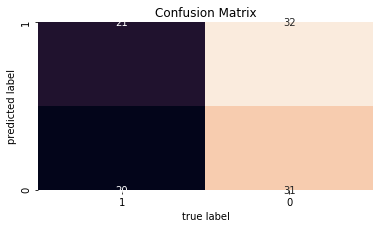

In [192]:
lucem_illud_2020.plotConfusionMatrix(clf_knearest, test_ng_df)

In [193]:
test_ng_df['knn_predict'] = clf_knearest.predict(np.stack(test_ng_df['vect'], axis=0))

print("Testing:")
print(clf_knearest.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))
print('Precision:')
print(sklearn.metrics.precision_score(test_ng_df['category'],test_ng_df['knn_predict'], average = 'weighted'))
print('Recall:')
print(sklearn.metrics.recall_score(test_ng_df['category'],test_ng_df['knn_predict'], average = 'weighted'))
print('F-measures:')
print(sklearn.metrics.f1_score(test_ng_df['category'],test_ng_df['knn_predict'], average = 'weighted'))

Testing:
0.5
Precision:
0.5244173140954496
Recall:
0.5
F-measures:
0.5055991041433371


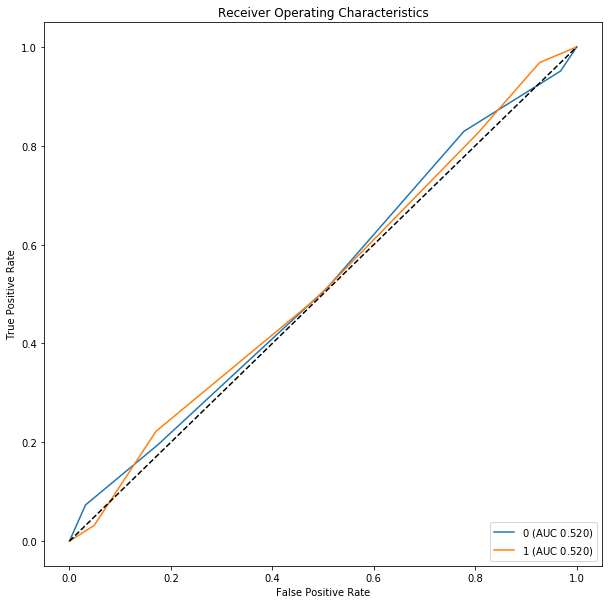

In [194]:
lucem_illud_2020.plotMultiROC(clf_knearest, test_ng_df)

KNN produced a relatively higher error rates than logistic regression and random forest, and it seems that its overfitting problem is reduced but there is still huge space for improvement.

## <span style="color:red">*Exercise 5*</span>

<span style="color:red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, Naive Bayes, logistic and decision-tree approaches?

#### Neural Network

In [195]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_ng_df['vect'], axis=0), train_ng_df['category'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [196]:
lucem_illud_2020.evaluateClassifier(clf_nn, test_ng_df)

Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0           0.461538  0.521099   0.418605           0.404931  0.439024
1           0.461538  0.521099   0.622951           0.616133  0.603175

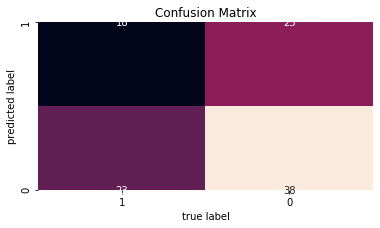

In [197]:
lucem_illud_2020.plotConfusionMatrix(clf_nn, test_ng_df)

In [198]:
print('Precision:')
print(sklearn.metrics.precision_score(test_ng_df['category'],clf_nn.predict(np.stack(test_ng_df['vect'], axis = 0)), average = 'weighted'))
print('Recall:')
print(sklearn.metrics.recall_score(test_ng_df['category'],clf_nn.predict(np.stack(test_ng_df['vect'], axis = 0)), average = 'weighted'))
print('F-measures:')
print(sklearn.metrics.f1_score(test_ng_df['category'],clf_nn.predict(np.stack(test_ng_df['vect'], axis = 0)), average = 'weighted'))

Precision:
0.5423912724713335
Recall:
0.5384615384615384
F-measures:
0.5402339595887984


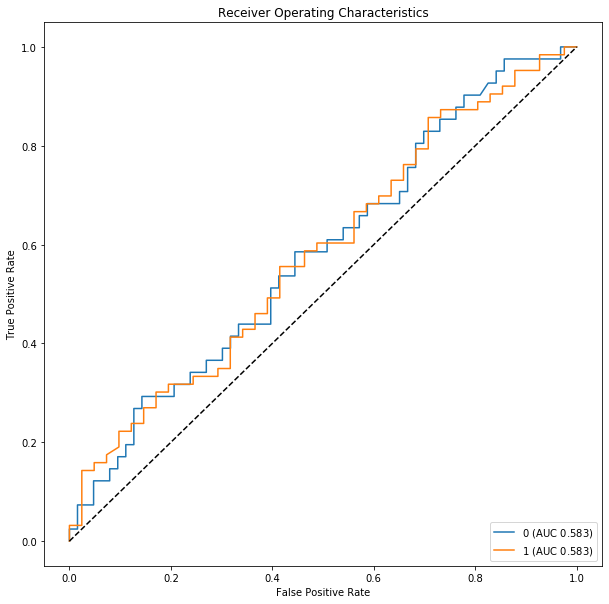

In [199]:
lucem_illud_2020.plotMultiROC(clf_nn, test_ng_df)

Neural network performs worst among the models above. It has the highest error rate and lowest AUC.